# Attrition in HR Prediction Project

In [386]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [387]:
#loading the dataset
df=pd.read_csv('HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [238]:
df.shape

(1470, 35)

This dataset contains 1470 rows and 35 columns.

In [239]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [240]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [241]:
df.sample(15)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
833,27,No,Travel_Rarely,199,Research & Development,6,3,Life Sciences,1,1162,...,3,80,1,4,0,3,4,2,2,2
965,25,No,Travel_Rarely,882,Research & Development,19,1,Medical,1,1358,...,3,80,3,7,6,2,3,2,1,2
401,56,No,Travel_Frequently,906,Sales,6,3,Life Sciences,1,532,...,4,80,3,36,0,2,7,7,7,7
197,42,No,Non-Travel,926,Research & Development,21,2,Medical,1,270,...,2,80,1,11,5,3,5,3,0,2
1328,27,No,Travel_Rarely,728,Sales,23,1,Medical,1,1864,...,4,80,1,9,5,3,9,8,5,8
696,45,No,Non-Travel,805,Research & Development,4,2,Life Sciences,1,972,...,2,80,0,9,5,2,9,7,0,8
848,35,No,Travel_Frequently,636,Research & Development,4,4,Other,1,1185,...,2,80,1,2,2,4,2,2,2,2
13,34,No,Travel_Rarely,1346,Research & Development,19,2,Medical,1,18,...,3,80,1,3,2,3,2,2,1,2
169,32,No,Travel_Rarely,120,Research & Development,6,5,Life Sciences,1,231,...,1,80,0,8,2,3,5,4,1,4
684,40,No,Travel_Rarely,658,Sales,10,4,Marketing,1,954,...,2,80,1,11,2,2,1,0,0,0


In [242]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [243]:
# To see columns in a list
df.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

# Checking Null Values

In [244]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Here, we can see that no null/missing values present in this dataset.

<Axes: >

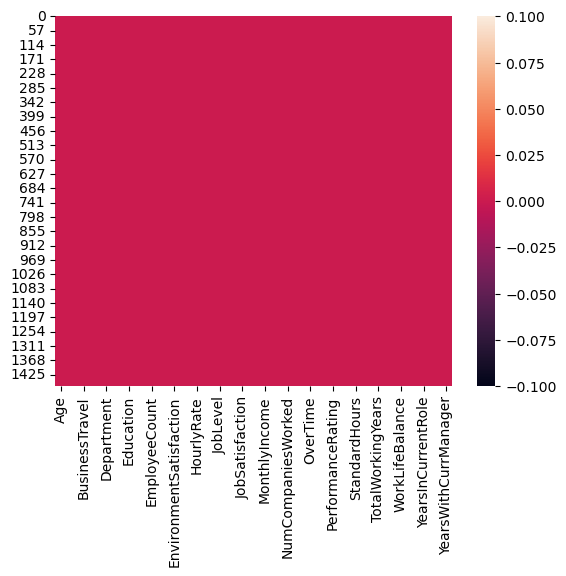

In [246]:
sns.heatmap(df.isnull())

In [247]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# Dropping Columns

In [248]:
for i in df.columns:
    if(df[i].dtype==object):
        print(i,"\n")
        print(df[i].value_counts(),"\n")

Attrition 

No     1233
Yes     237
Name: Attrition, dtype: int64 

BusinessTravel 

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64 

Department 

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64 

EducationField 

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64 

Gender 

Male      882
Female    588
Name: Gender, dtype: int64 

JobRole 

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64 

MaritalStatus 

Married     673
Single      470
Divorced    327

All employees must be Over 18.
Here we see that in 'Over18' column all 1470 values are 'Yes'. It will not make any impact in prediction of Attrition rate, so we will drop it.

In [388]:
df.drop(['Over18'], axis =1, inplace=True)

In [250]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [389]:
df.shape

(1470, 34)

'Over18' is dropped.

In [252]:
df.nunique().to_frame("No. of Unique values")

,No. of Unique values
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


In [390]:
df['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [391]:
df['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [392]:
df['EmployeeNumber'].value_counts()

1       1
1391    1
1389    1
1387    1
1383    1
       ..
659     1
657     1
656     1
655     1
2068    1
Name: EmployeeNumber, Length: 1470, dtype: int64

'EmployeeCount' column contain only one value '1'.

'StandardHours' column contain only one value '80'.

Each employee has unique 'EmployeeNumber' so it has '1470' unique values.

These columns will not make any impact in prediction of Attrition rate, so we will drop it.

In [394]:
df.drop(['EmployeeCount'], axis =1, inplace=True)
df.drop(['StandardHours'], axis =1, inplace=True)
df.drop(['EmployeeNumber'], axis =1, inplace=True)

In [395]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [396]:
df.shape

(1470, 31)

Here, we can see that those columns have been removed.

# Checking for duplicate values

In [259]:
df[df.duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


Here, we can see that no duplicates found.

In [260]:
#statistical summary of numerical columns
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [261]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

Out of 31 columns 23 are integer datatype and 7 columns are having object datatype.

# Data Visualisation

Univariant Analysis

No     1233
Yes     237
Name: Attrition, dtype: int64

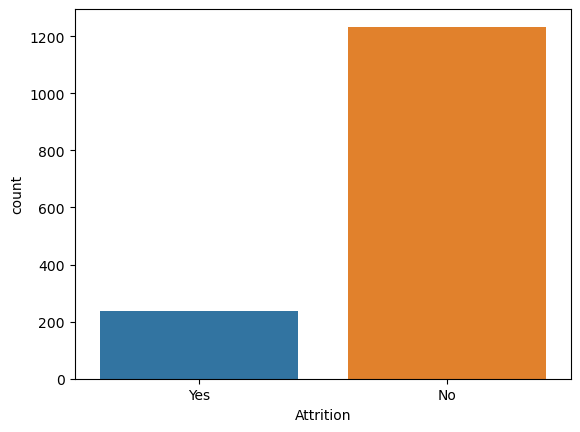

In [262]:
sns.countplot(x='Attrition', data =df)
df['Attrition'].value_counts()

We can see that count of 'No' is more in Attrition.

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

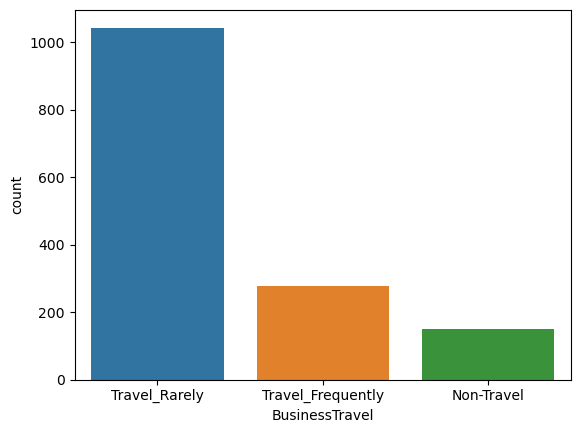

In [263]:
sns.countplot(x='BusinessTravel', data =df)
df['BusinessTravel'].value_counts()

Employees who Travel rarely is more compared to others.

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

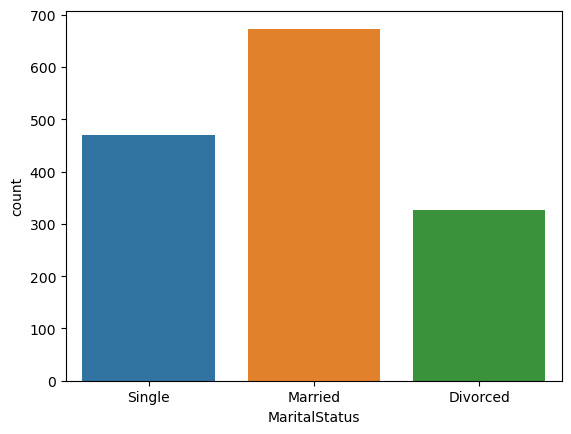

In [264]:
sns.countplot(x='MaritalStatus', data =df)
df['MaritalStatus'].value_counts()

Most of the employees are married.

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

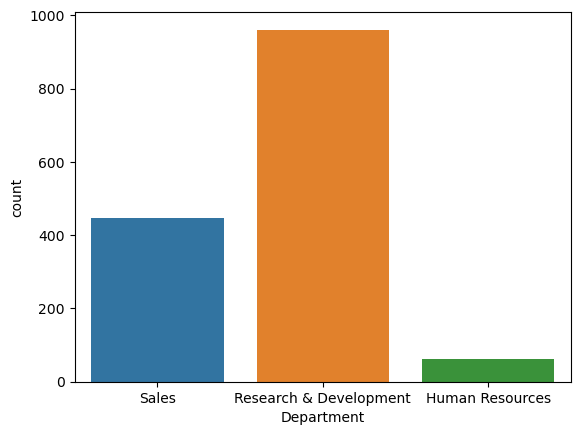

In [266]:
sns.countplot(x='Department', data =df)
df['Department'].value_counts()

Employees are more in Research & Development Department.

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

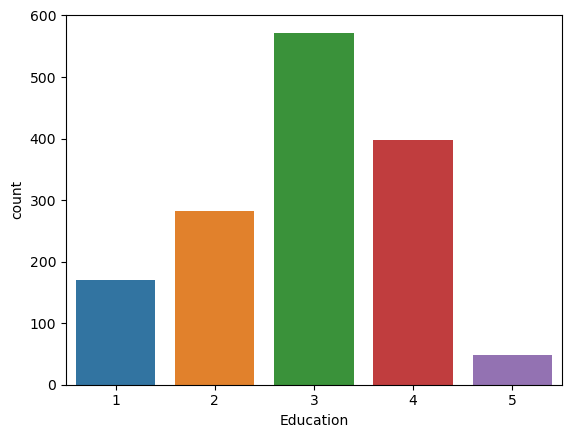

In [267]:
sns.countplot(x='Education', data =df)
df['Education'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

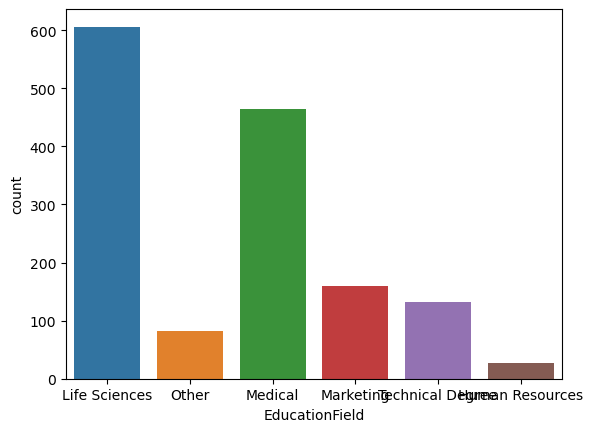

In [268]:
sns.countplot(x='EducationField', data =df)
df['EducationField'].value_counts()

Most of the employees are from Life Sciences Education field.

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

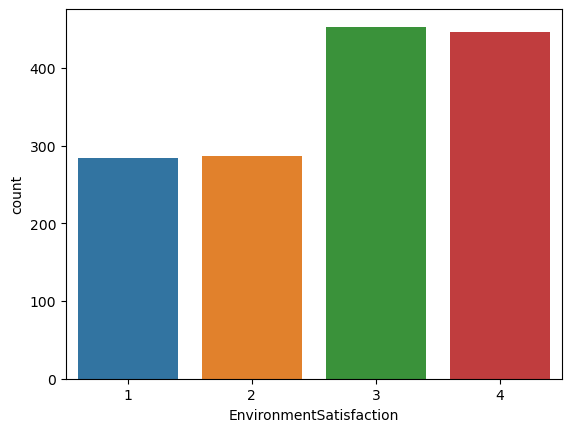

In [269]:
sns.countplot(x='EnvironmentSatisfaction', data =df)
df['EnvironmentSatisfaction'].value_counts()

Most of the employees are Environmently Satisfied.

Male      882
Female    588
Name: Gender, dtype: int64

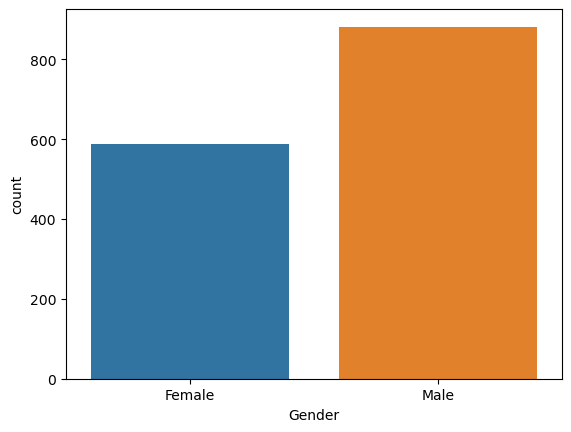

In [270]:
sns.countplot(x='Gender', data =df)
df['Gender'].value_counts()

The count of Male employees are more.

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

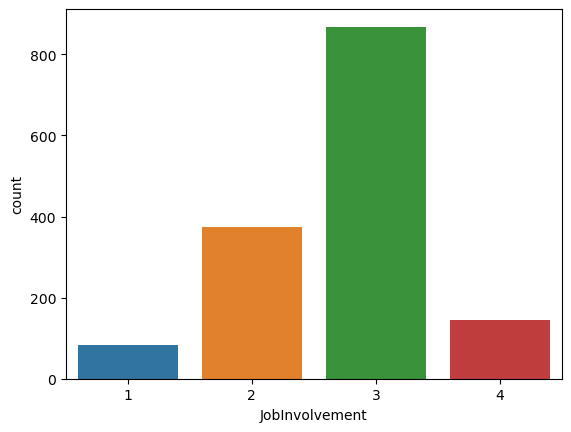

In [271]:
sns.countplot(x='JobInvolvement', data =df)
df['JobInvolvement'].value_counts()

Most employees have Level 3 in Job Involvement.

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

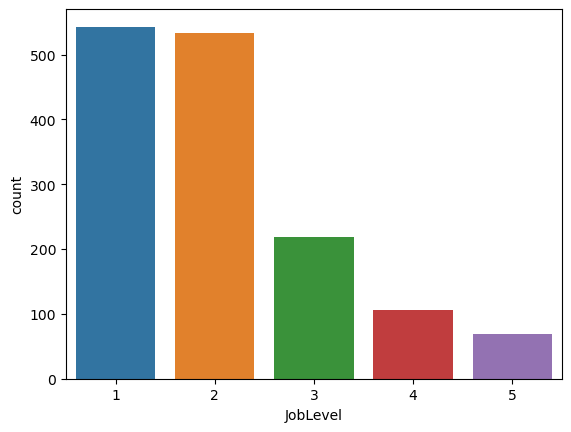

In [272]:
sns.countplot(x='JobLevel', data =df)
df['JobLevel'].value_counts()

Most of the employees are in Job Level 1

<function matplotlib.pyplot.show(close=None, block=None)>

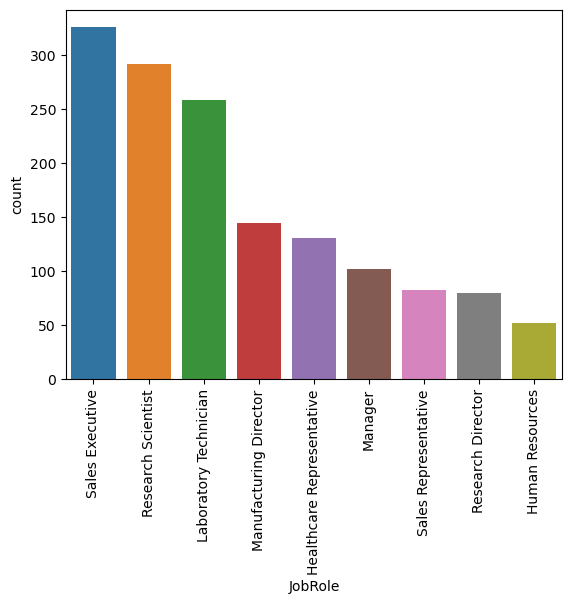

In [273]:
sns.countplot(x='JobRole', data =df)
df['JobRole'].value_counts()
plt.xticks(rotation=90)
plt.show

Most of the employees are in Sales Executive Role.

No     1054
Yes     416
Name: OverTime, dtype: int64

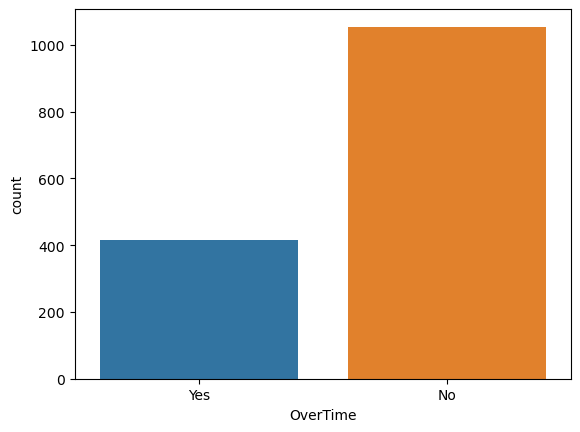

In [275]:
sns.countplot(x='OverTime', data =df)
df['OverTime'].value_counts()

Most of the employees did not do OverTime.

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64

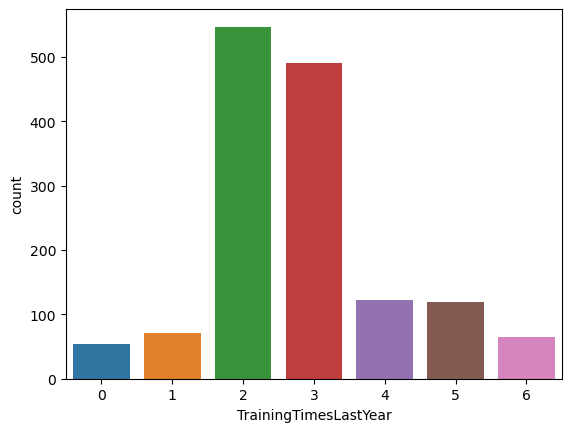

In [276]:
sns.countplot(x='TrainingTimesLastYear', data =df)
df['TrainingTimesLastYear'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

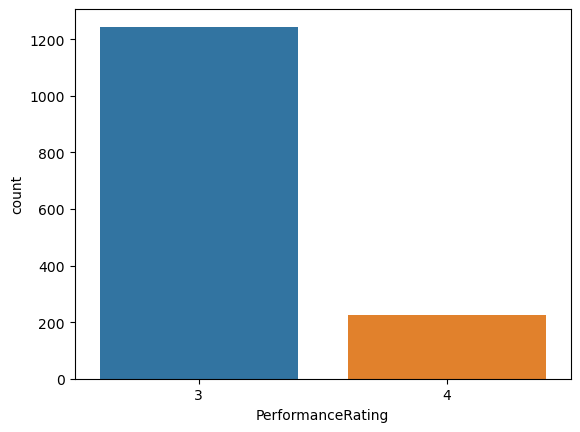

In [277]:
sns.countplot(x='PerformanceRating', data =df)
df['PerformanceRating'].value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

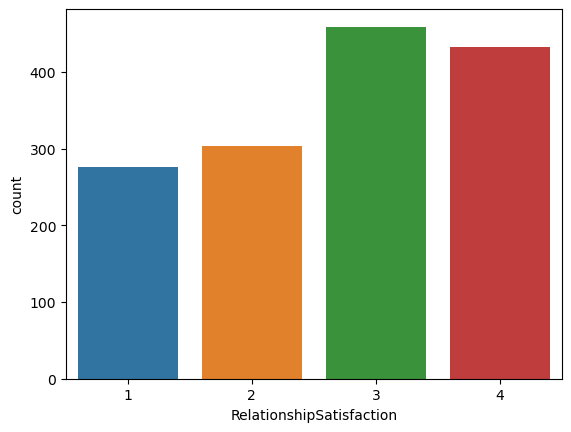

In [278]:
sns.countplot(x='RelationshipSatisfaction', data =df)
df['RelationshipSatisfaction'].value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

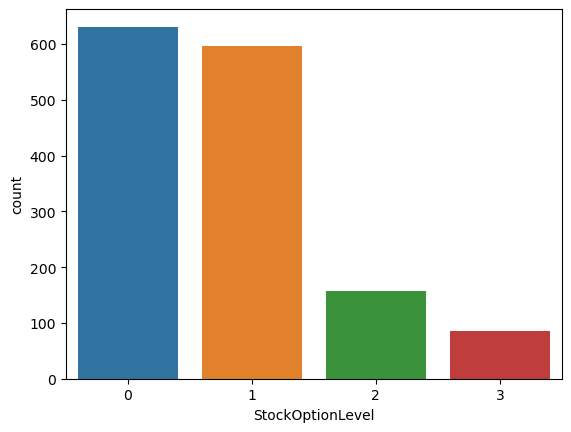

In [279]:
sns.countplot(x='StockOptionLevel', data =df)
df['StockOptionLevel'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

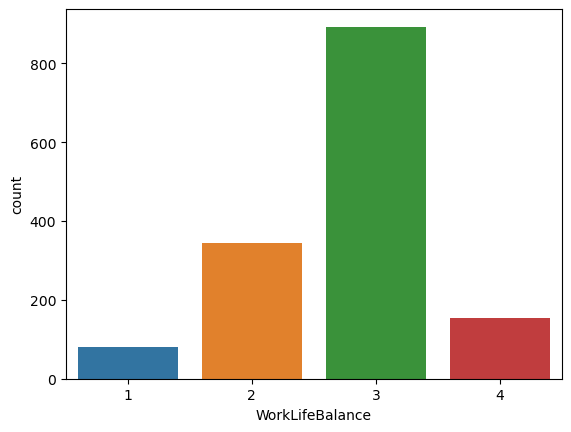

In [280]:
sns.countplot(x='WorkLifeBalance', data =df)
df['WorkLifeBalance'].value_counts()

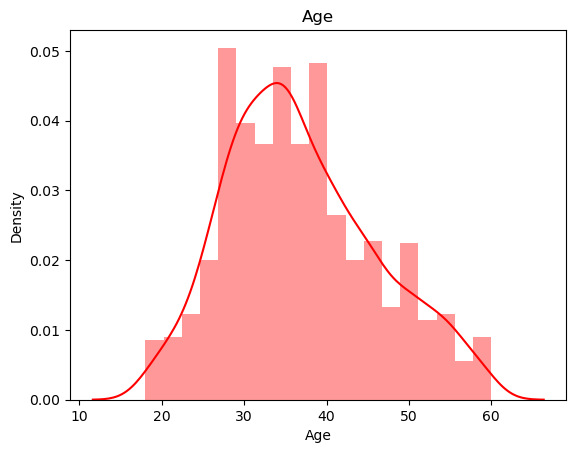

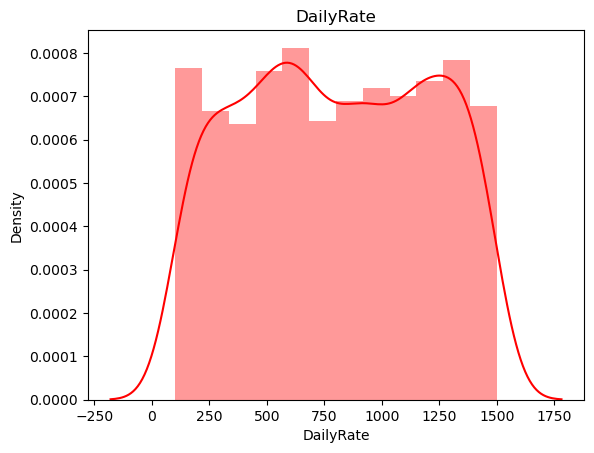

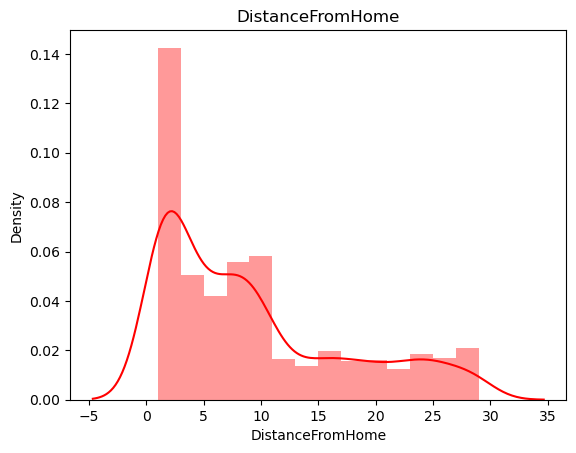

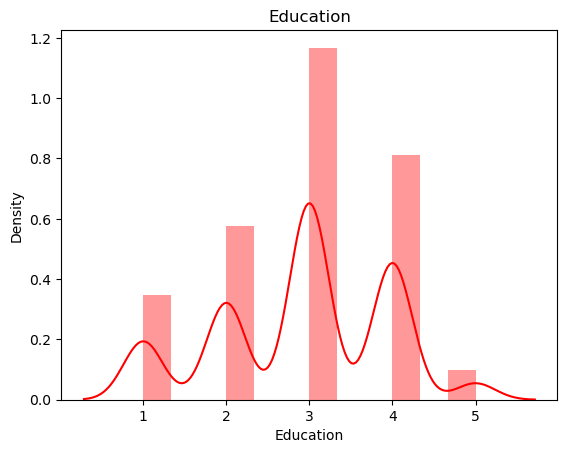

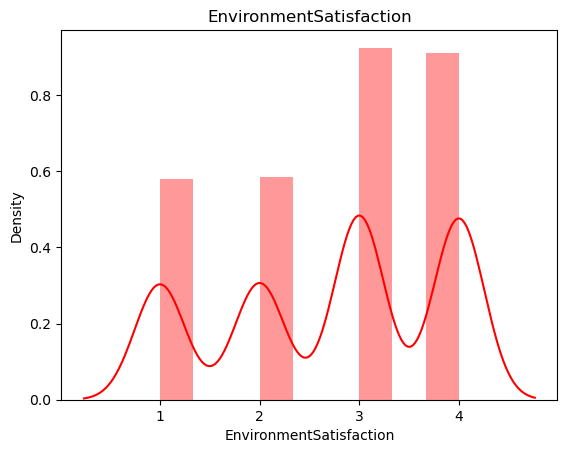

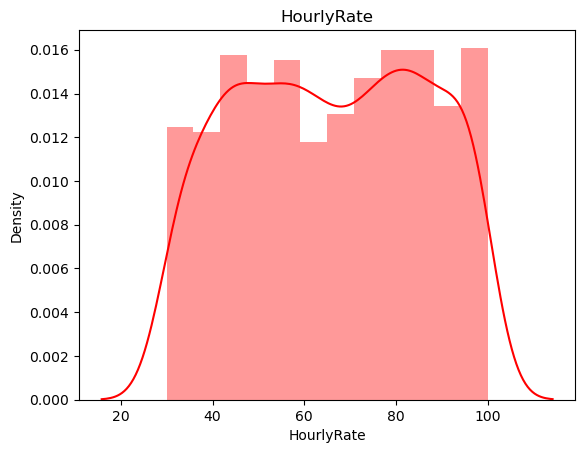

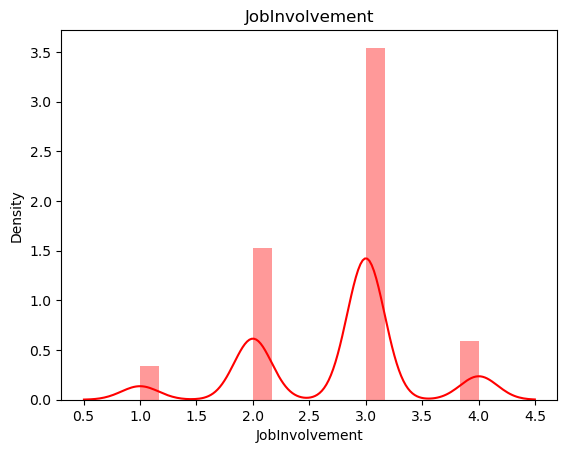

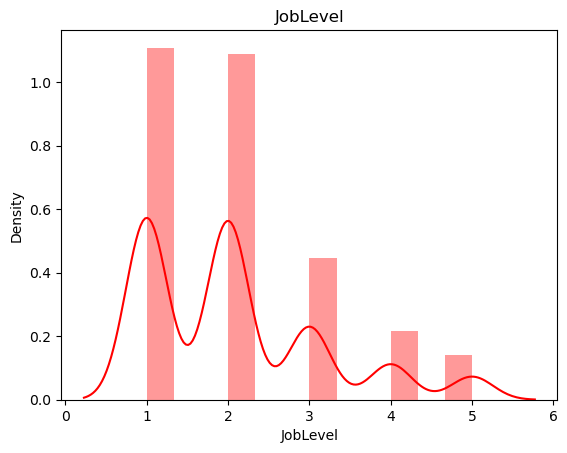

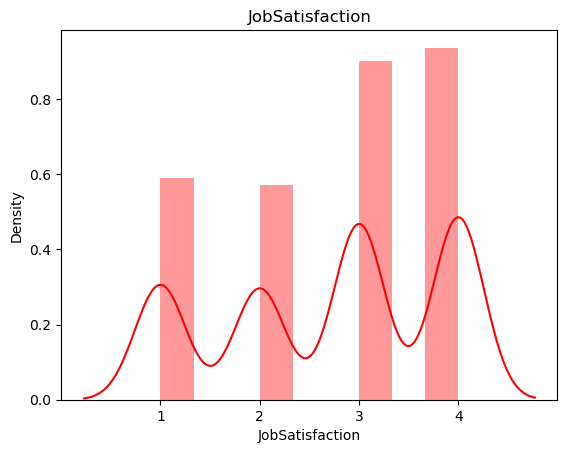

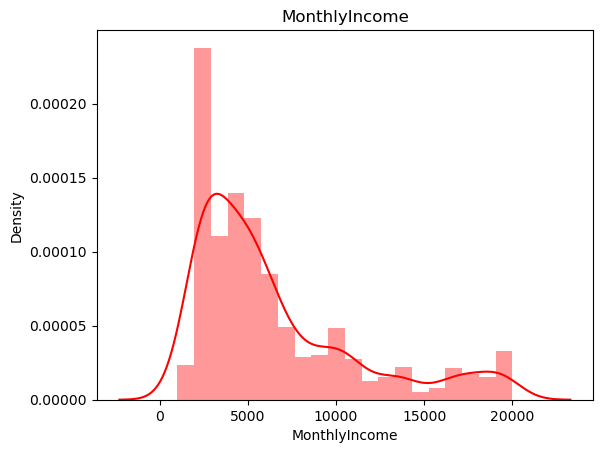

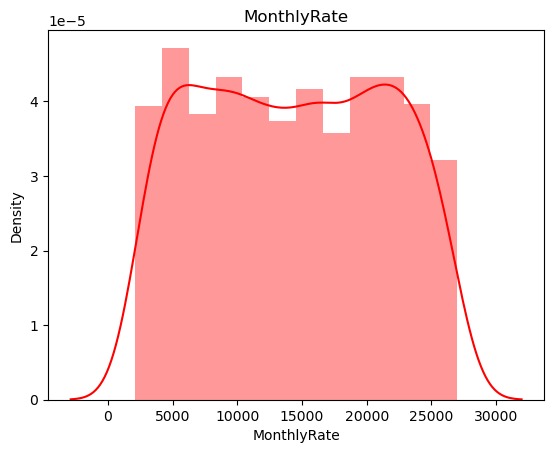

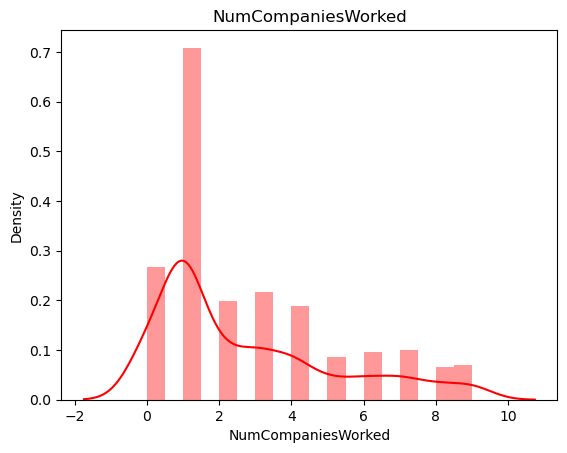

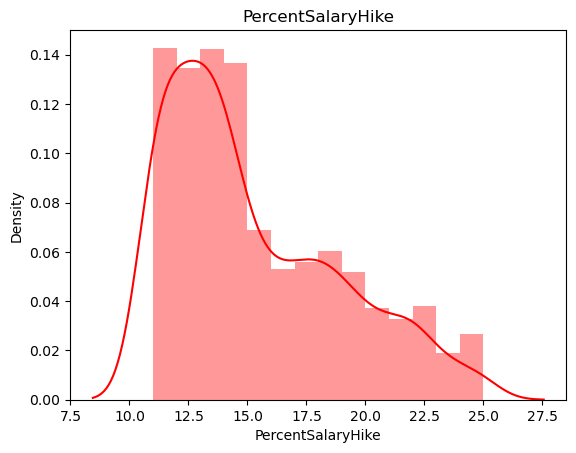

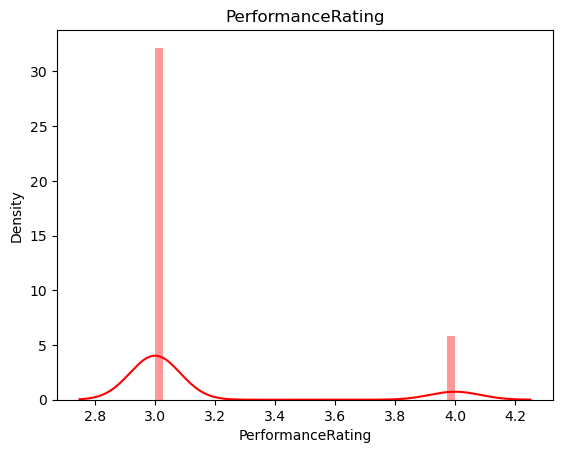

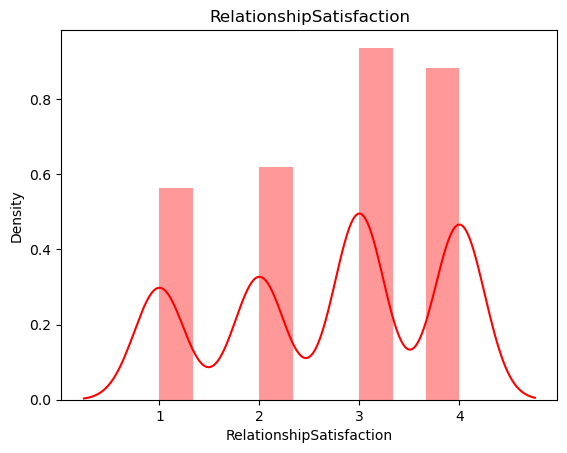

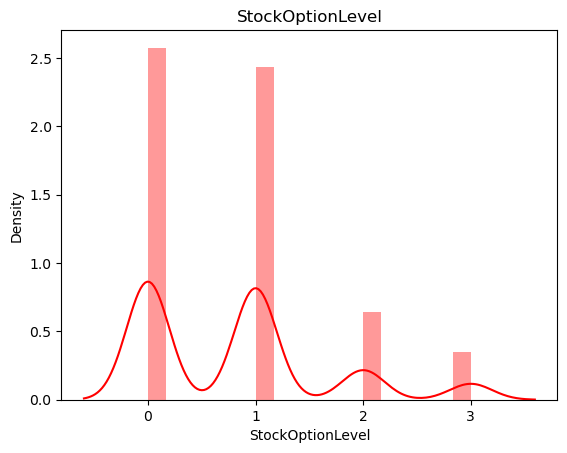

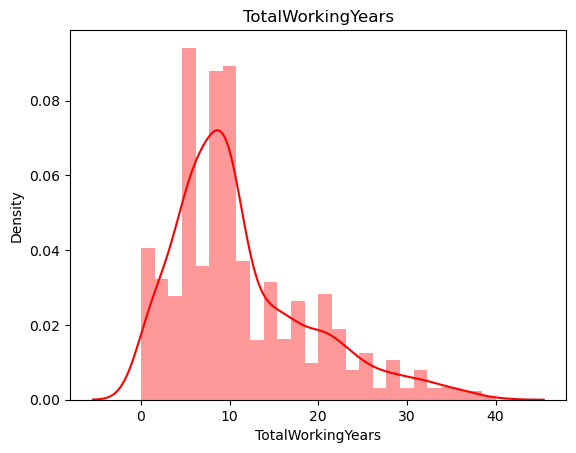

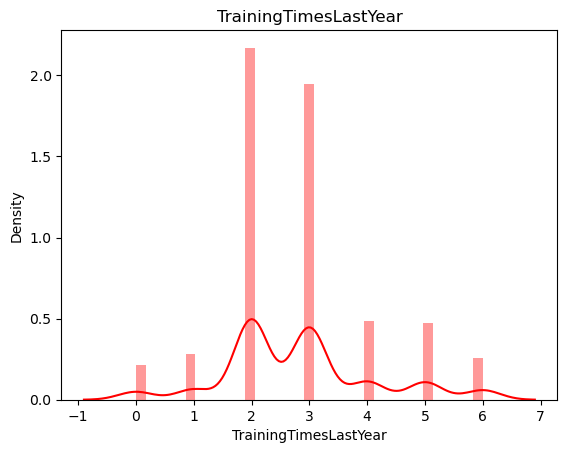

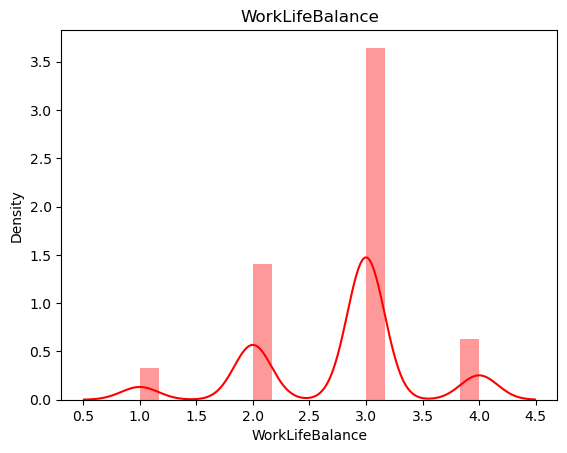

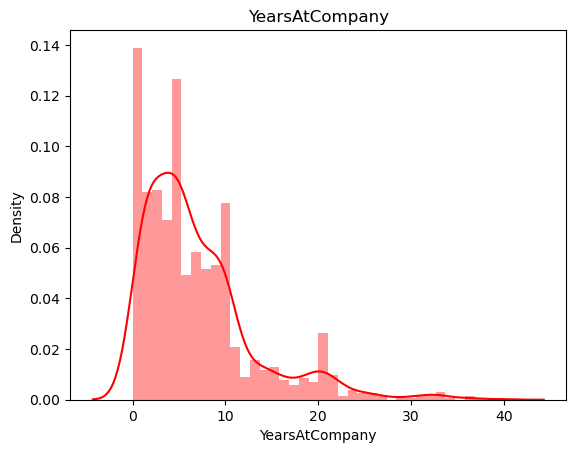

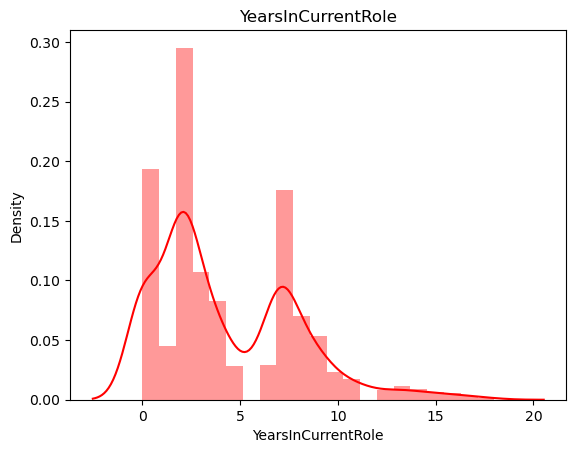

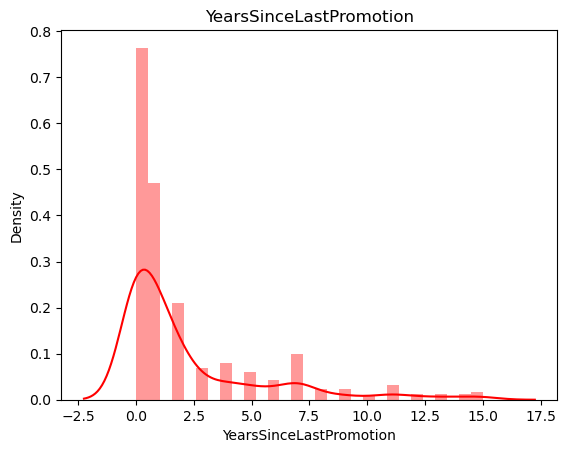

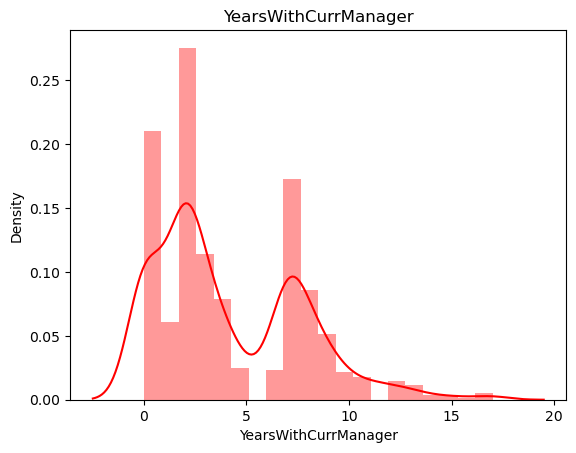

In [281]:
for i in df.columns :
    if df[i].dtype!=object:
        sns.distplot(df[i] , kde = True , color = 'red' )
        plt.title(i)
        plt.show()

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

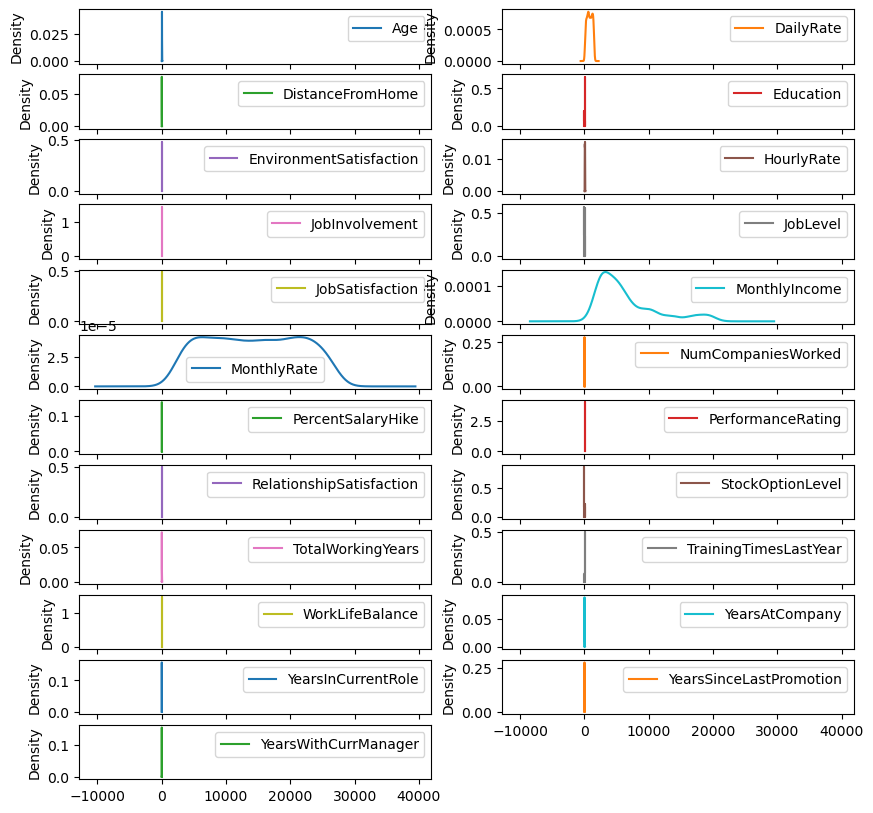

In [282]:
plot = df.plot(kind='kde', subplots=True, layout=(12,2), figsize=(10,10))
plot

BiVariant Analysis

<Axes: xlabel='BusinessTravel', ylabel='count'>

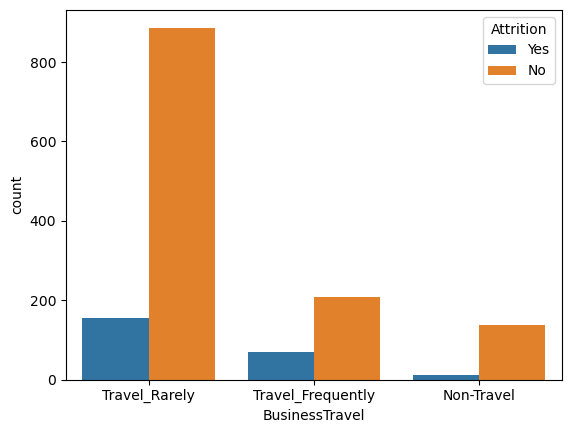

In [283]:
sns.countplot(x='BusinessTravel',hue='Attrition',data=df)

<Axes: xlabel='Department', ylabel='count'>

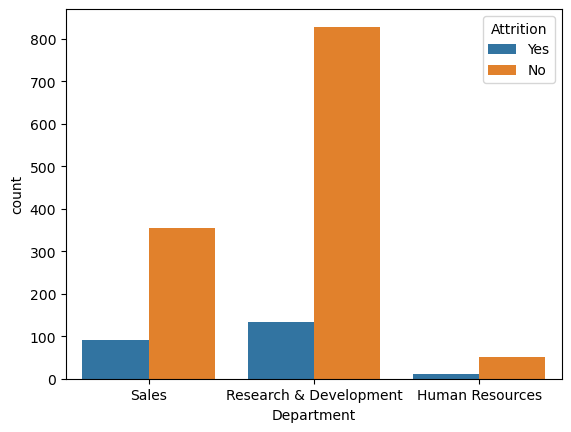

In [284]:
sns.countplot(x='Department',hue='Attrition',data=df)

<Axes: xlabel='Education', ylabel='count'>

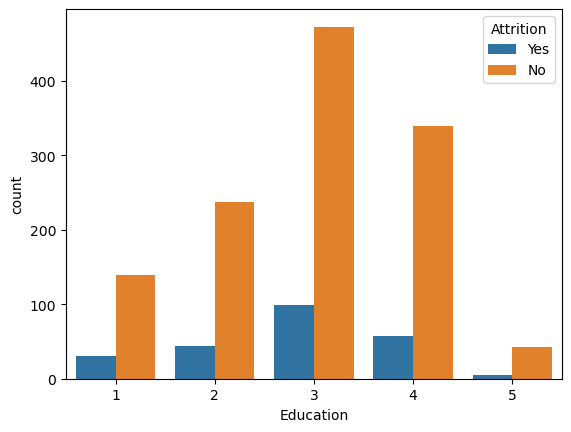

In [285]:
sns.countplot(x='Education',hue='Attrition',data=df)

<function matplotlib.pyplot.show(close=None, block=None)>

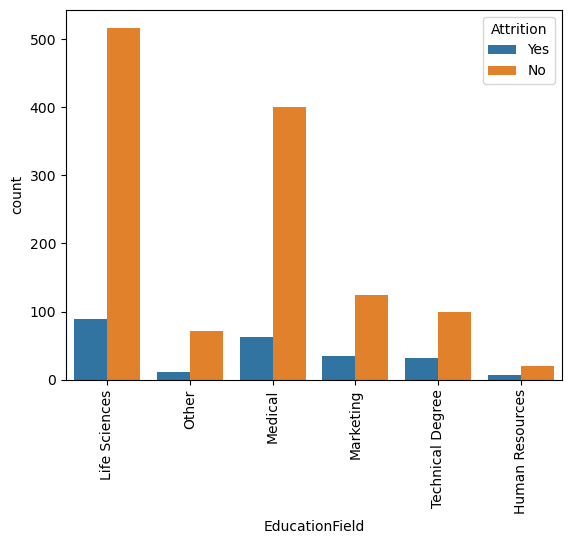

In [286]:
sns.countplot(x='EducationField',hue='Attrition',data=df)
plt.xticks(rotation=90)
plt.show

<Axes: xlabel='EnvironmentSatisfaction', ylabel='count'>

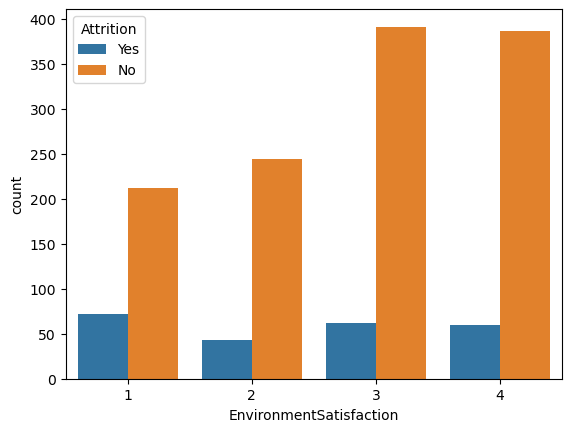

In [287]:
sns.countplot(x='EnvironmentSatisfaction',hue='Attrition',data=df)

<Axes: xlabel='Gender', ylabel='count'>

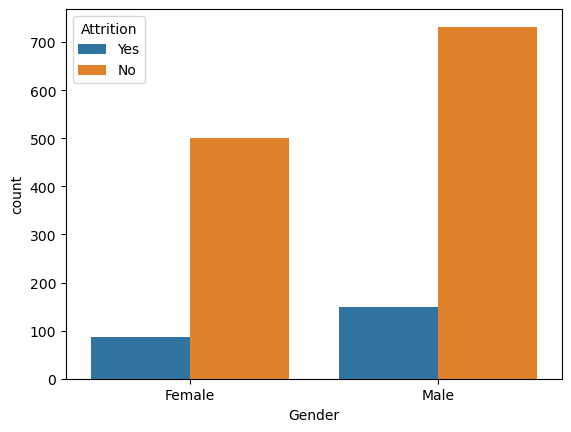

In [288]:
sns.countplot(x='Gender',hue='Attrition',data=df)

<Axes: xlabel='JobInvolvement', ylabel='count'>

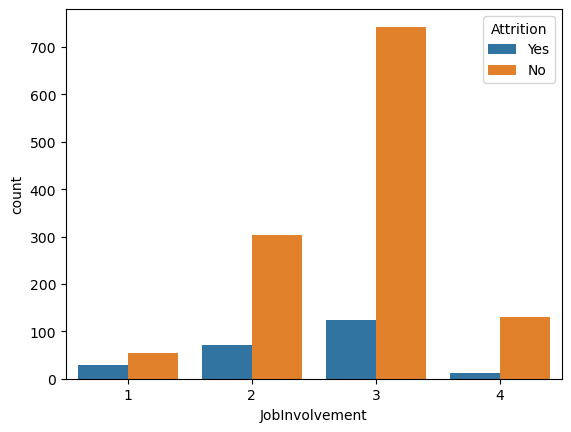

In [289]:
sns.countplot(x='JobInvolvement',hue='Attrition',data=df)

<Axes: xlabel='JobLevel', ylabel='count'>

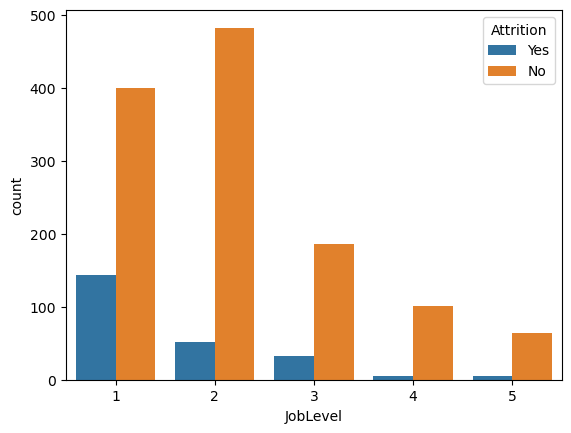

In [290]:
sns.countplot(x='JobLevel',hue='Attrition',data=df)

<function matplotlib.pyplot.show(close=None, block=None)>

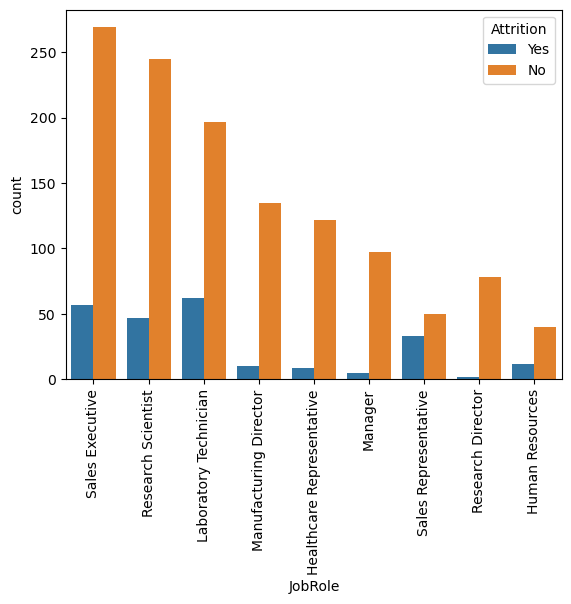

In [291]:
sns.countplot(x='JobRole',hue='Attrition',data=df)
plt.xticks(rotation=90)
plt.show

<Axes: xlabel='JobSatisfaction', ylabel='count'>

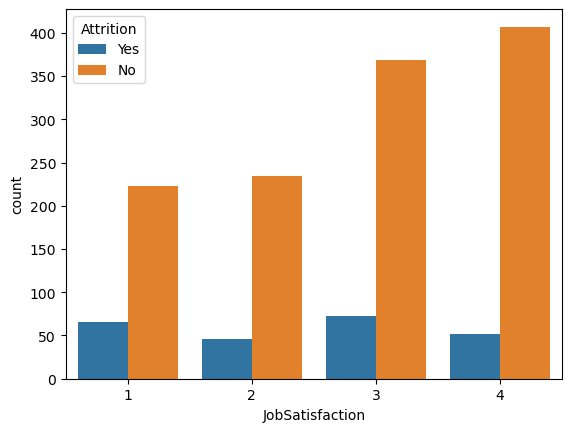

In [292]:
sns.countplot(x='JobSatisfaction',hue='Attrition',data=df)

<Axes: xlabel='MaritalStatus', ylabel='count'>

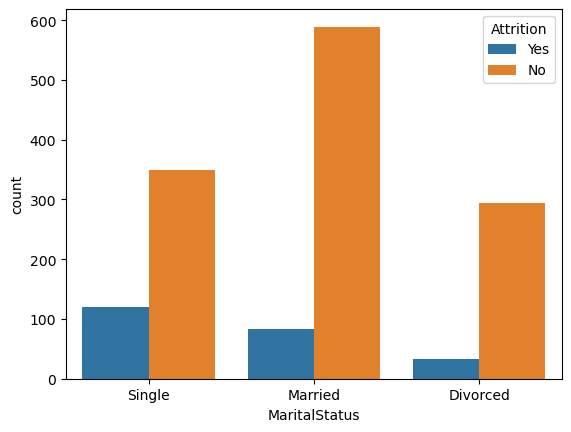

In [293]:
sns.countplot(x='MaritalStatus',hue='Attrition',data=df)

<Axes: xlabel='NumCompaniesWorked', ylabel='count'>

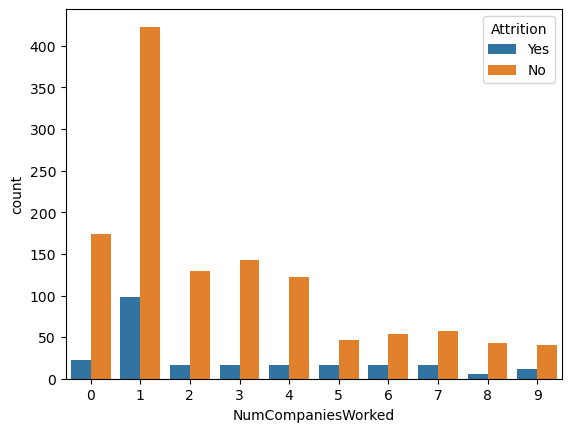

In [294]:
sns.countplot(x='NumCompaniesWorked',hue='Attrition',data=df)

<Axes: xlabel='OverTime', ylabel='count'>

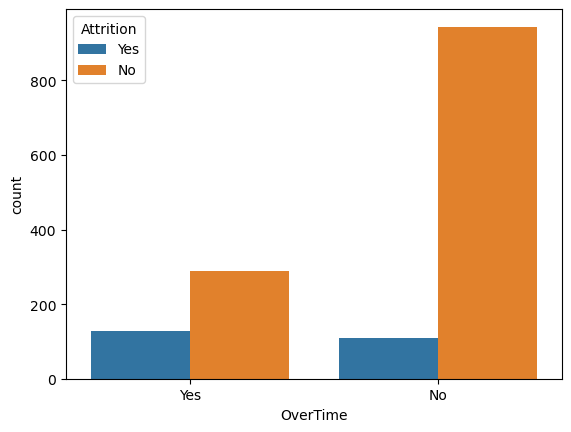

In [295]:
sns.countplot(x='OverTime',hue='Attrition',data=df)

<Axes: xlabel='PerformanceRating', ylabel='count'>

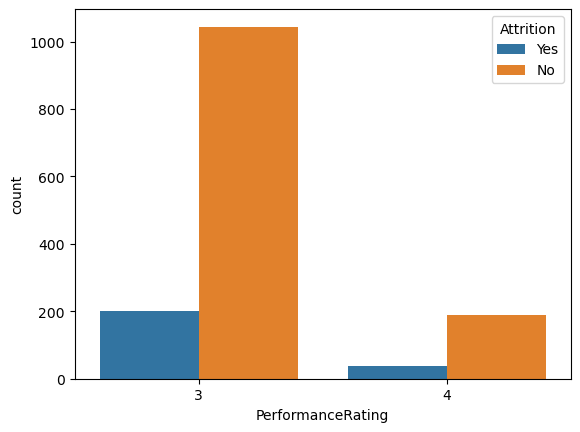

In [296]:
sns.countplot(x='PerformanceRating',hue='Attrition',data=df)

<Axes: xlabel='RelationshipSatisfaction', ylabel='count'>

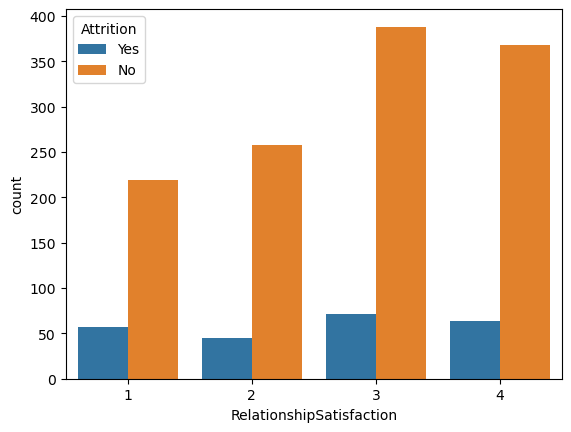

In [297]:
sns.countplot(x='RelationshipSatisfaction',hue='Attrition',data=df)

<Axes: xlabel='StockOptionLevel', ylabel='count'>

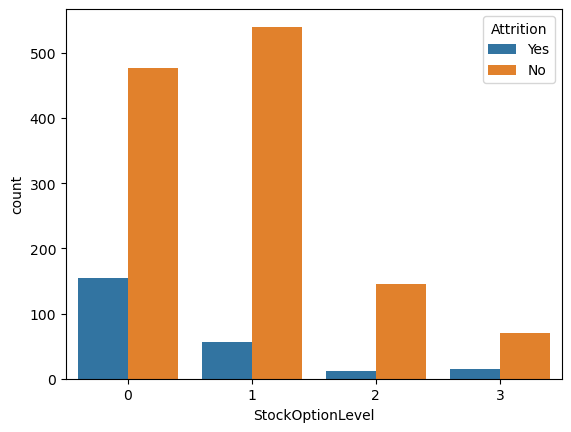

In [298]:
sns.countplot(x='StockOptionLevel',hue='Attrition',data=df)

<Axes: xlabel='TrainingTimesLastYear', ylabel='count'>

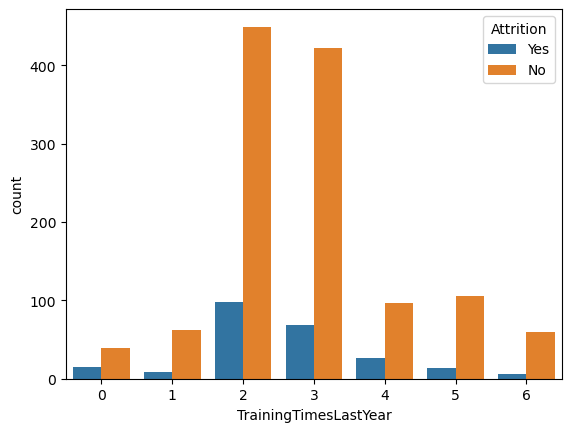

In [299]:
sns.countplot(x='TrainingTimesLastYear',hue='Attrition',data=df)

<Axes: xlabel='WorkLifeBalance', ylabel='count'>

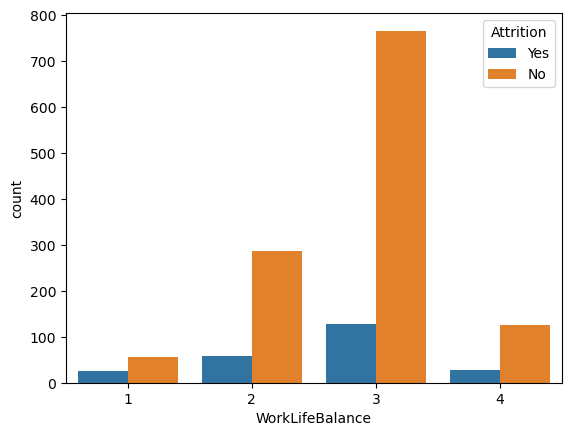

In [300]:
sns.countplot(x='WorkLifeBalance',hue='Attrition',data=df)

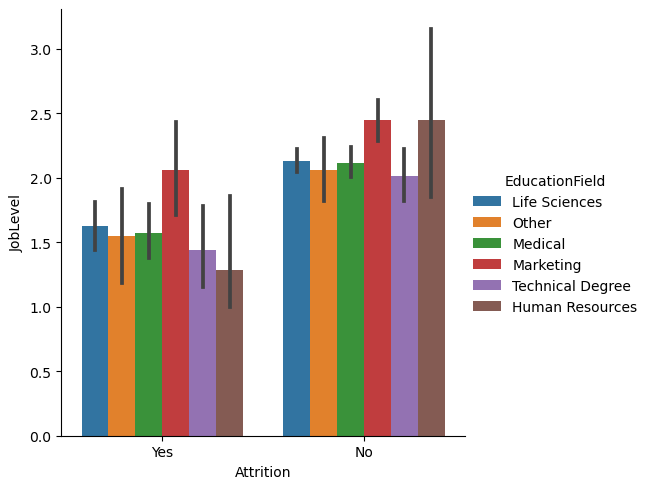

In [301]:
sns.catplot(x='Attrition',y='JobLevel', hue='EducationField',data=df,kind='bar')

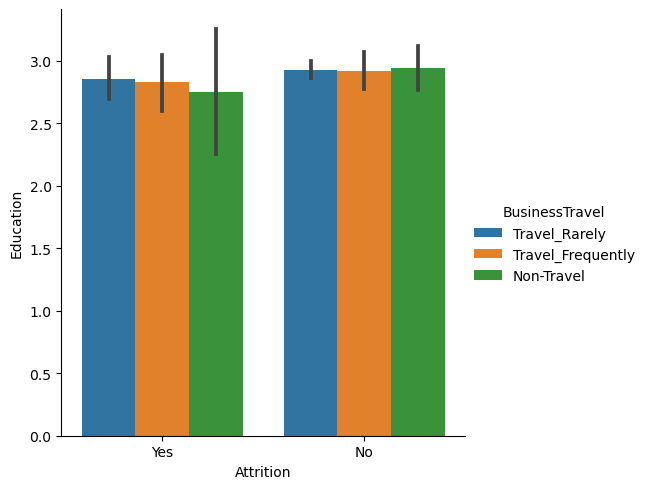

In [302]:
sns.catplot(x='Attrition',y='Education', hue='BusinessTravel',data=df,kind='bar')

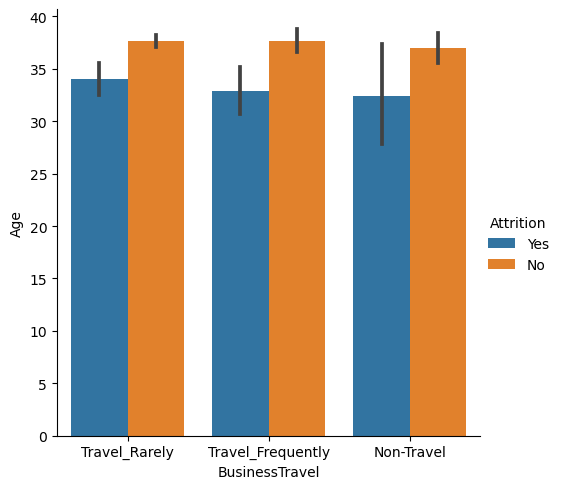

In [303]:
sns.catplot(x='BusinessTravel',y='Age', hue='Attrition',data=df,kind='bar')

In [304]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

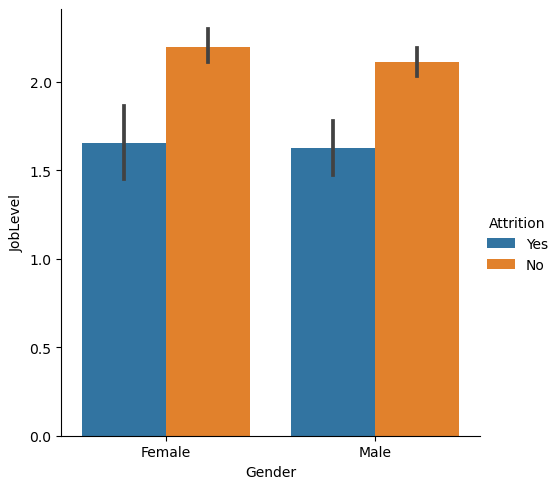

In [305]:
sns.catplot(x='Gender',y='JobLevel', hue='Attrition',data=df,kind='bar')

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

# Encoding categorical column

Converting Categorical column to numerical column

In [397]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))

In [308]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,1.0,884,1.0,23,2,3.0,3,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,39,0.0,2.0,613,1.0,6,1,3.0,4,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,27,0.0,2.0,155,1.0,4,3,1.0,2,1.0,...,4,2,1,6,0,3,6,2,0,3
1468,49,0.0,1.0,1023,2.0,2,3,3.0,4,1.0,...,3,4,0,17,3,2,9,6,0,8


In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   float64
 2   BusinessTravel            1470 non-null   float64
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   float64
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   float64
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   float64
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   float64
 14  JobSatis

In [398]:
df['OverTime'] = df['OverTime'].astype(int)
df['MaritalStatus'] = df['MaritalStatus'].astype(int)
df['JobRole'] = df['JobRole'].astype(int)
df['Gender'] = df['Gender'].astype(int)
df['EducationField'] = df['EducationField'].astype(int)
df['Department'] = df['Department'].astype(int)
df['BusinessTravel'] = df['BusinessTravel'].astype(int)
df['Attrition'] = df['Attrition'].astype(int)

In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int32
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int32
 14  JobSatisfaction           1470 non-null 

In [312]:
df1=df.iloc[:,0:15]
df2=df.iloc[:,15:]

In [313]:
df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction'],
      dtype='object')

In [314]:
df2.columns

Index(['MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [315]:
df1.shape

(1470, 15)

In [316]:
df2.shape

(1470, 16)

In [317]:
df1.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,65.891156,2.729932,2.063946,4.458503,2.728571
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,20.329428,0.711561,1.106940,2.461821,1.102846
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,30.000000,1.000000,1.000000,0.000000,1.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,66.000000,3.000000,2.000000,5.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,83.750000,3.000000,3.000000,7.000000,4.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,100.000000,4.000000,5.000000,8.000000,4.000000


In [318]:
df2.describe()

,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1.097279,6502.931293,14313.103401,2.693197,0.282993,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,0.730121,4707.956783,7117.786044,2.498009,0.450606,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,1009.000000,2094.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2911.000000,8047.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1.000000,4919.000000,14235.500000,2.000000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,2.000000,8379.000000,20461.500000,4.000000,1.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,2.000000,19999.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


From the above datas, we can see that,
 
    1.The dataset looks perfect because it did not have any negative/invalid datas.
    2.The counts are same, so missing/null values.
    3.In some columns there is difference between mean and median, so skewness is present.
    4.There is also huge difference between 75% and max in  'MonthlyRate', 'MonthlyIncome', 'NumCompaniesWorked', 
      'TotalWorkingYears','YearsAtCompany', 'YearsInCurrentRole', 'DailyRate', 'DistanceFromHome' columns, so outliers are             present.   

# Checking Correlation

In [319]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


<Axes: >

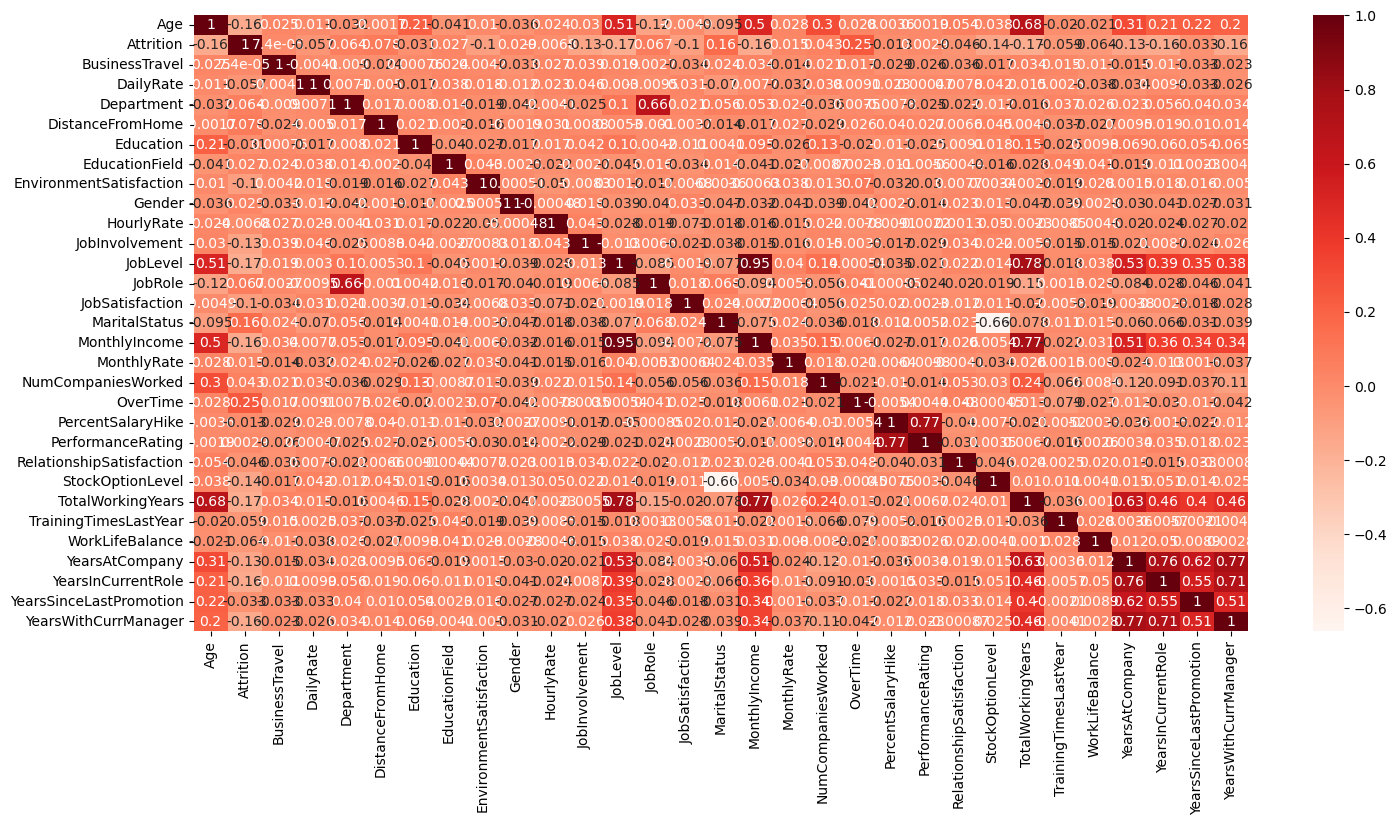

In [320]:
plt.figure(figsize=(17,8))
sns.heatmap(df.corr(),cmap='Reds',annot=True)

<Axes: >

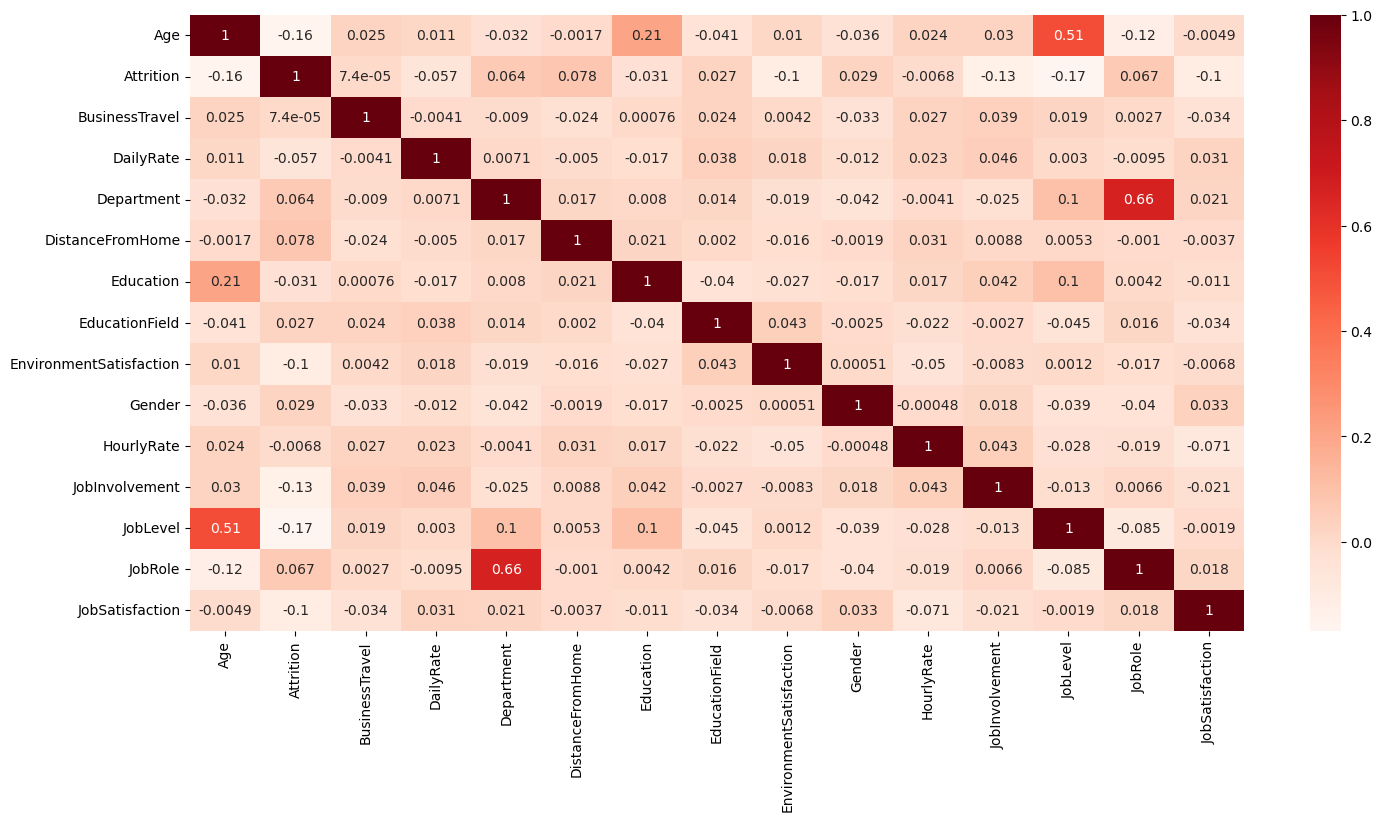

In [321]:
plt.figure(figsize=(17,8))
sns.heatmap(df1.corr(),cmap='Reds',annot=True)

In [322]:
df2['Attrition'] = df['Attrition']

In [323]:
df2.columns

Index(['MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition'],
      dtype='object')

<Axes: >

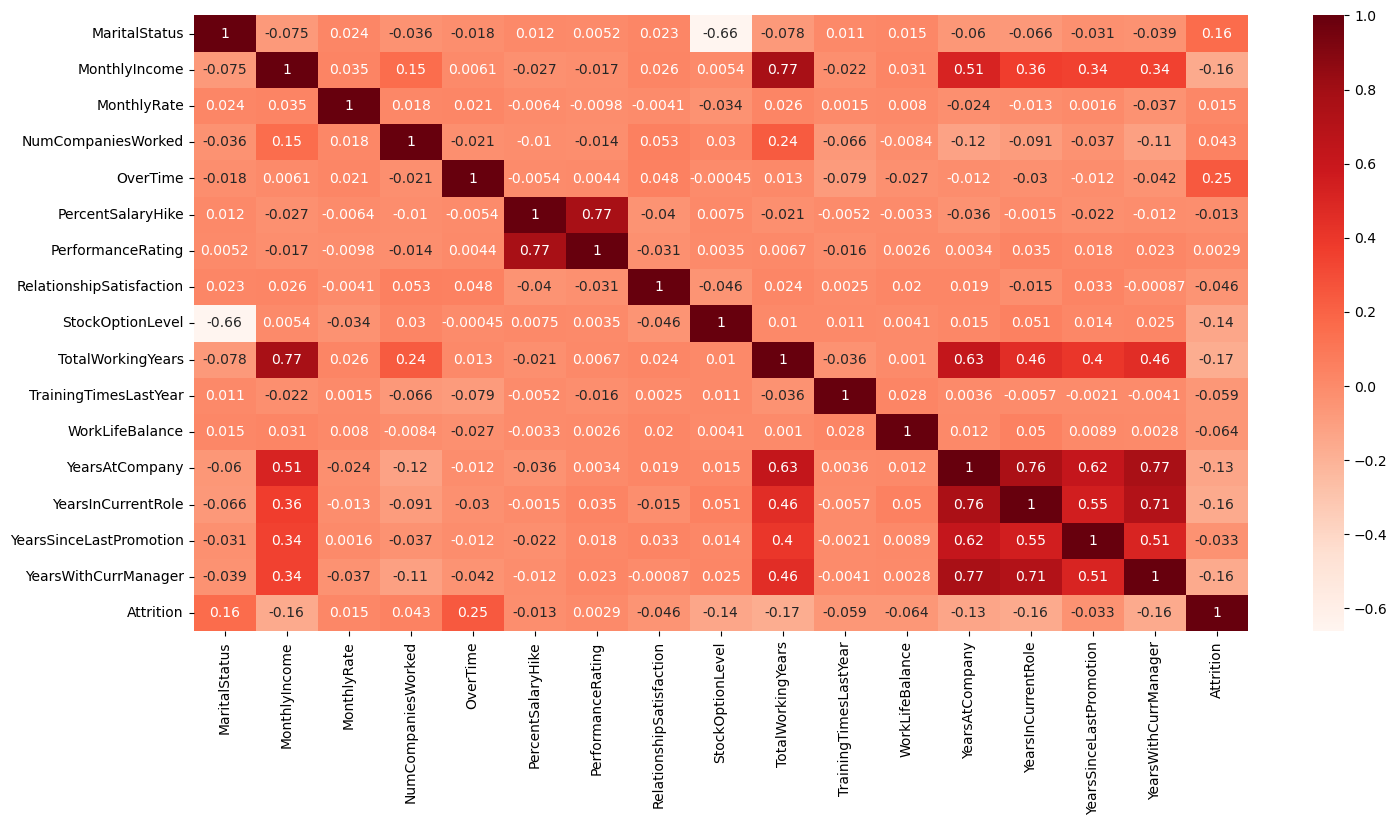

In [324]:
plt.figure(figsize=(17,8))
sns.heatmap(df2.corr(),cmap='Reds',annot=True)

From the above two correlation heatmaps, we can observe that,

    1.Features such as "PercentSalaryHike" and"PerformanceRating" are positively correlated with each other.
    2.Features such as "YearsAtCompany", "YearsSinceLastPromotion", "YearsInCurrentRole" and"YearsWithCurrManager" are positively correlated  to each other.
    3.The feature "MonthlyIncome" is having positive correlation with "TotalWorkingYears".

# Checking Outliers

Age                            Axes(0.125,0.839474;0.352273x0.0405263)
Attrition                   Axes(0.547727,0.839474;0.352273x0.0405263)
BusinessTravel                 Axes(0.125,0.790842;0.352273x0.0405263)
DailyRate                   Axes(0.547727,0.790842;0.352273x0.0405263)
Department                     Axes(0.125,0.742211;0.352273x0.0405263)
DistanceFromHome            Axes(0.547727,0.742211;0.352273x0.0405263)
Education                      Axes(0.125,0.693579;0.352273x0.0405263)
EducationField              Axes(0.547727,0.693579;0.352273x0.0405263)
EnvironmentSatisfaction        Axes(0.125,0.644947;0.352273x0.0405263)
Gender                      Axes(0.547727,0.644947;0.352273x0.0405263)
HourlyRate                     Axes(0.125,0.596316;0.352273x0.0405263)
JobInvolvement              Axes(0.547727,0.596316;0.352273x0.0405263)
JobLevel                       Axes(0.125,0.547684;0.352273x0.0405263)
JobRole                     Axes(0.547727,0.547684;0.352273x0.0405263)
JobSat

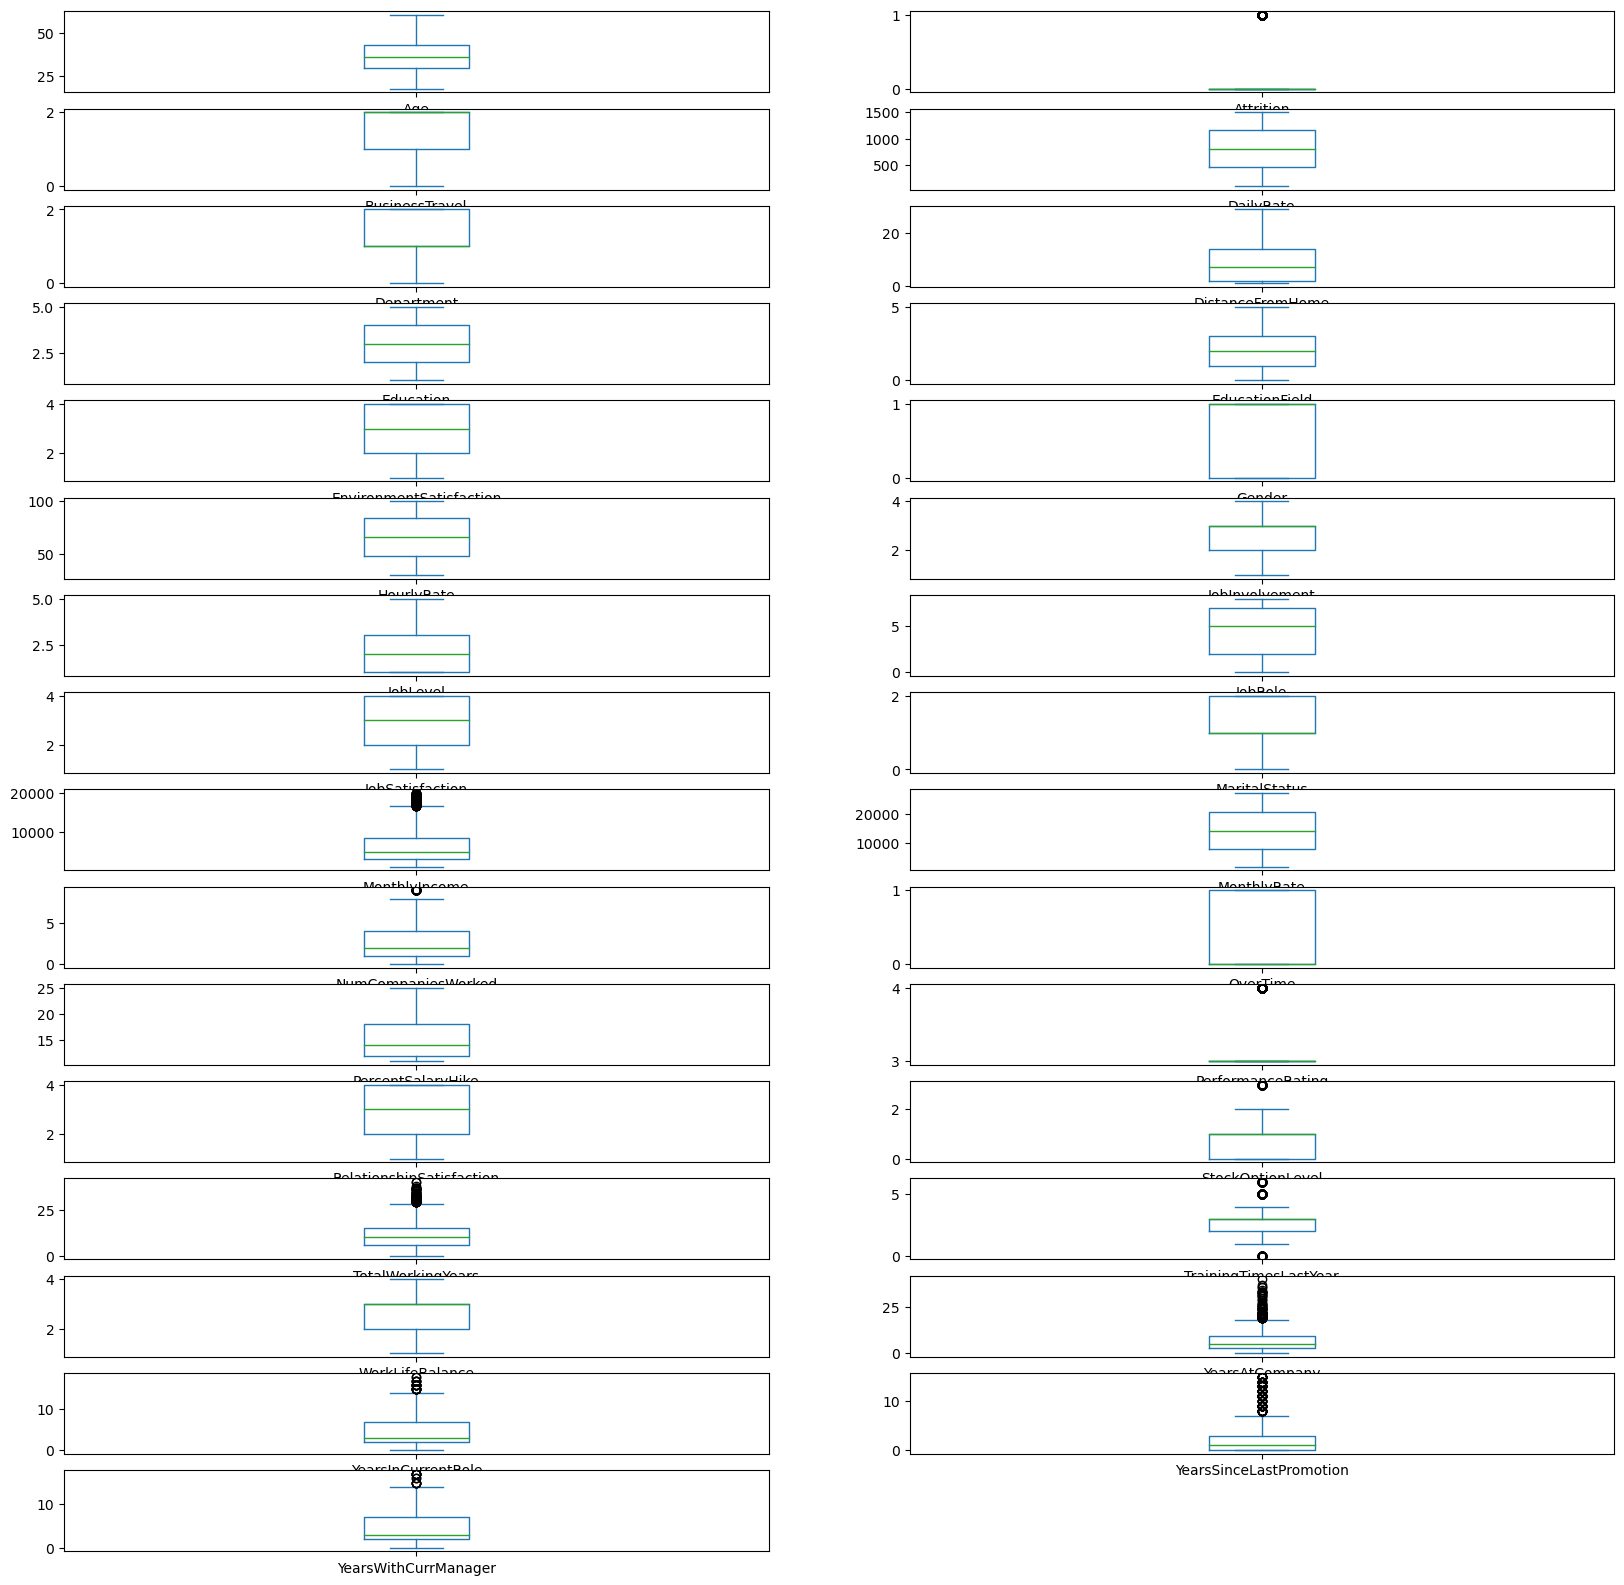

In [401]:
plot = df.plot(kind='box', subplots=True, layout=(16,2),figsize=(20,20))
plot

As we can see outliers are present, we will remove outliers using z score method

In [326]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,2.280906,0.590048,0.742527,1.401512,1.010909,0.891688,0.937414,0.660531,1.224745,...,0.426230,1.584178,0.932014,0.421642,2.171982,2.493820,0.164613,0.063296,0.679146,0.245834
1,1.322365,0.438422,0.913194,1.297775,0.493817,0.147150,1.868426,0.937414,0.254625,0.816497,...,2.346151,1.191438,0.241988,0.164511,0.155707,0.338096,0.488508,0.764998,0.368715,0.806541
2,0.008343,2.280906,0.590048,1.414363,0.493817,0.887515,0.891688,1.316673,1.169781,0.816497,...,0.426230,0.658973,0.932014,0.550208,0.155707,0.338096,1.144294,1.167687,0.679146,1.155935
3,0.429664,0.438422,0.913194,1.461466,0.493817,0.764121,1.061787,0.937414,1.169781,1.224745,...,0.426230,0.266233,0.932014,0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,1.155935
4,1.086676,0.438422,0.590048,0.524295,0.493817,0.887515,1.868426,0.565311,1.575686,0.816497,...,0.426230,1.191438,0.241988,0.678774,0.155707,0.338096,0.817734,0.615492,0.058285,0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.101159,0.438422,0.913194,0.202082,0.493817,1.703764,0.891688,0.565311,0.254625,0.816497,...,0.426230,0.266233,0.241988,0.735447,0.155707,0.338096,0.327893,0.615492,0.679146,0.314873
1466,0.227347,0.438422,0.590048,0.469754,0.493817,0.393938,1.868426,0.565311,1.169781,0.816497,...,0.426230,1.584178,0.241988,0.293077,1.707500,0.338096,0.001333,0.764998,0.368715,0.806541
1467,1.086676,0.438422,0.590048,1.605183,0.493817,0.640727,0.085049,0.937414,0.660531,0.816497,...,2.346151,0.658973,0.241988,0.678774,2.171982,0.338096,0.164613,0.615492,0.679146,0.314873
1468,1.322365,0.438422,0.913194,0.546677,1.401512,0.887515,0.085049,0.565311,1.169781,0.816497,...,0.426230,1.191438,0.932014,0.735447,0.155707,1.077862,0.325228,0.488900,0.679146,1.086895


In [327]:
# threshold =3
np.where(z>3)

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
         123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
         218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
         401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
         561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
         677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
         875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
         962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
        1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
        1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
       dtype=int64),
 array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
        29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
        27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
        24

In [328]:
z.iloc[28,30]

3.6100788863016295

In [329]:
df_new=df[(z<3).all(axis=1)]

In [330]:
df_new

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [331]:
df.shape

(1470, 31)

In [332]:
df_new.shape

(1387, 31)

In [333]:
print("Data loss percentage = ",((df.shape[0]-df_new.shape[0])/df.shape[0])*100)

Data loss percentage =  5.646258503401361


In [334]:
df=df_new

In [335]:
df.shape

(1387, 31)

# Checking Skewness

In [336]:
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [337]:
df['YearsWithCurrManager'] = np.cbrt(df['YearsWithCurrManager'])
df['YearsSinceLastPromotion'] = np.cbrt(df['YearsSinceLastPromotion'])
df['YearsInCurrentRole'] = np.cbrt(df['YearsInCurrentRole'])
df['YearsAtCompany'] = np.cbrt(df['YearsAtCompany'])
df['TotalWorkingYears'] = np.cbrt(df['TotalWorkingYears'])
df['PercentSalaryHike'] = np.cbrt(df['PercentSalaryHike'])
df['NumCompaniesWorked'] = np.cbrt(df['NumCompaniesWorked'])
df['MonthlyIncome'] = np.cbrt(df['MonthlyIncome'])
df['JobLevel'] = np.cbrt(df['JobLevel'])
df['DistanceFromHome'] = np.cbrt(df['DistanceFromHome'])

In [338]:
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.183373
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.508238
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               0.742985
MonthlyRate                 0.030596
NumCompaniesWorked         -0.689329
OverTime                    0.954751
PercentSalaryHike           0.582921
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears          -0.563399
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

# Splitting target variable

In [339]:
x = df.drop("Attrition", axis = 1)
y= df['Attrition']

In [340]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1.000000,2,1,2,0,94,...,3,1,0,2.000000,0,1,1.817121,1.587401,0.000000,1.709976
1,49,1,279,1,2.000000,1,1,3,1,61,...,4,4,1,2.154435,3,3,2.154435,1.912931,1.000000,1.912931
2,37,2,1373,1,1.259921,2,4,4,1,92,...,3,2,0,1.912931,3,3,0.000000,0.000000,0.000000,0.000000
3,33,1,1392,1,1.442250,4,1,4,0,56,...,3,3,0,2.000000,3,3,2.000000,1.912931,1.442250,0.000000
4,27,2,591,1,1.259921,1,3,1,1,40,...,3,4,1,1.817121,3,3,1.259921,1.259921,1.259921,1.259921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,2.843867,2,3,3,1,41,...,3,3,1,2.571282,3,3,1.709976,1.259921,0.000000,1.442250
1466,39,2,613,1,1.817121,1,3,4,1,42,...,3,1,1,2.080084,5,3,1.912931,1.912931,1.000000,1.912931
1467,27,2,155,1,1.587401,3,1,2,1,87,...,4,2,1,1.817121,0,3,1.817121,1.259921,0.000000,1.442250
1468,49,1,1023,2,1.259921,3,3,4,1,63,...,3,4,0,2.571282,3,2,2.080084,1.817121,0.000000,2.000000


In [341]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1387, dtype: int32

# To remove biasness, we use Standard scaler method

In [342]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.536681,0.593126,0.734325,1.405373,-1.410317,-0.876177,-0.940815,-0.665328,-1.229911,1.388670,...,-0.424765,-1.575817,-0.929427,-0.114048,-2.171420,-2.501172,0.252482,0.392669,-1.092503,0.591785
1,1.442111,-0.905354,-1.307769,-0.496337,0.161865,-1.853858,-0.940815,0.251978,0.813067,-0.239091,...,2.354241,1.199034,0.238250,0.184647,0.151871,0.336558,0.878987,0.866219,0.294582,0.880566
2,0.083966,0.593126,1.406752,-0.496337,-1.001674,-0.876177,1.305159,1.169285,0.813067,1.290017,...,-0.424765,-0.650866,-0.929427,-0.282450,0.151871,0.336558,-3.122519,-1.916528,-1.092503,-1.841300
3,-0.368749,-0.905354,1.453896,-0.496337,-0.715020,1.079185,-0.940815,1.169285,-1.229911,-0.485721,...,-0.424765,0.274084,-0.929427,-0.114048,0.151871,0.336558,0.592150,0.866219,0.908019,-1.841300
4,-1.047821,0.593126,-0.533609,-0.496337,-1.001674,-1.853858,0.556501,-1.582635,0.813067,-1.274939,...,-0.424765,1.199034,0.238250,-0.467759,0.151871,0.336558,-0.782424,-0.083717,0.655114,-0.048587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,-0.029213,-0.905354,0.193406,-0.496337,1.488578,-0.876177,0.556501,0.251978,0.813067,-1.225613,...,-0.424765,0.274084,0.238250,0.990880,0.151871,0.336558,0.053478,-0.083717,-1.092503,0.210844
1383,0.310324,0.593126,-0.479021,-0.496337,-0.125655,-1.853858,0.556501,1.169285,0.813067,-1.176286,...,-0.424765,-1.575817,0.238250,0.040844,1.700732,0.336558,0.430434,0.866219,0.294582,0.880566
1384,-1.047821,0.593126,-1.615447,-0.496337,-0.486815,0.101504,-0.940815,-0.665328,0.813067,1.043387,...,2.354241,-0.650866,0.238250,-0.467759,-2.171420,0.336558,0.252482,-0.083717,-1.092503,0.210844
1385,1.442111,-0.905354,0.538304,1.405373,-1.001674,0.101504,0.556501,1.169285,0.813067,-0.140439,...,-0.424765,1.199034,-0.929427,0.990880,0.151871,-1.082307,0.740892,0.726843,-1.092503,1.004454


# Checking multicollinearity

In [343]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["features"] = x.columns

vif

,VIF values,features
0,1.842735,Age
1,1.016682,BusinessTravel
2,1.026682,DailyRate
3,2.084821,Department
4,1.018986,DistanceFromHome
5,1.059308,Education
6,1.021130,EducationField
7,1.023012,EnvironmentSatisfaction
8,1.024922,Gender
9,1.022574,HourlyRate


Here we can see that no multicollinearity present between features.

# Balancing dataset

In [344]:
y.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

Here, we can see that data is not balanced. Since it is a classification problem, we will balance the data using oversampling method

In [345]:
import sklearn
from imblearn.over_sampling import SMOTE
SME = SMOTE()
x1,y1 = SME.fit_resample(x,y)

In [346]:
y1.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

Now, the dataset is balanced, we can go for model building

# Model Building

In [347]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
maxAcc = 0
maxRS= 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred = RFC.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
        
print("The best accuracy is ", maxAcc, "at random state ", maxRS)

The best accuracy is  0.9597122302158273 at random state  117


# Train Test Split

In [348]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=maxRS)

# Classification Algorithms

In [349]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve

Random Forest Classifier

In [350]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print("Accuracy for RandomForestClassifier model is ", accuracy_score(y_test,predRFC)*100)
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

Accuracy for RandomForestClassifier model is  95.39568345323741
[[340   7]
 [ 25 323]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       347
           1       0.98      0.93      0.95       348

    accuracy                           0.95       695
   macro avg       0.96      0.95      0.95       695
weighted avg       0.96      0.95      0.95       695



Logistic Regression

In [351]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print("Accuracy for LogisticRegression model is ", accuracy_score(y_test,predLR)*100)
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

Accuracy for LogisticRegression model is  79.13669064748201
[[278  69]
 [ 76 272]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       347
           1       0.80      0.78      0.79       348

    accuracy                           0.79       695
   macro avg       0.79      0.79      0.79       695
weighted avg       0.79      0.79      0.79       695



Support Vector Machine Classifier

In [352]:
svc = SVC()
svc.fit(x_train,y_train)
predSVC = svc.predict(x_test)
print("Accuracy for SVC model is ", accuracy_score(y_test,predSVC)*100)
print(confusion_matrix(y_test,predSVC))
print(classification_report(y_test,predSVC))

Accuracy for SVC model is  90.35971223021583
[[312  35]
 [ 32 316]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       347
           1       0.90      0.91      0.90       348

    accuracy                           0.90       695
   macro avg       0.90      0.90      0.90       695
weighted avg       0.90      0.90      0.90       695



Gaussian Naive Bayes

In [353]:
GNB = GaussianNB()
GNB.fit(x_train,y_train)
predGNB = GNB.predict(x_test)
print("Accuracy for GaussianNB model is ", accuracy_score(y_test,predGNB)*100)
print(confusion_matrix(y_test,predGNB))
print(classification_report(y_test,predGNB))

Accuracy for GaussianNB model is  71.94244604316546
[[255  92]
 [103 245]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       347
           1       0.73      0.70      0.72       348

    accuracy                           0.72       695
   macro avg       0.72      0.72      0.72       695
weighted avg       0.72      0.72      0.72       695



Decision Tree Classifier

In [354]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDTC = DTC.predict(x_test)
print("Accuracy for DecisionTreeClassifier model is ", accuracy_score(y_test,predDTC)*100)
print(confusion_matrix(y_test,predDTC))
print(classification_report(y_test,predDTC))

Accuracy for DecisionTreeClassifier model is  86.90647482014388
[[293  54]
 [ 37 311]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       347
           1       0.85      0.89      0.87       348

    accuracy                           0.87       695
   macro avg       0.87      0.87      0.87       695
weighted avg       0.87      0.87      0.87       695



KNeighbors Classifier

In [355]:
Knn = KNeighborsClassifier()
Knn.fit(x_train,y_train)
predKnn = Knn.predict(x_test)
print("Accuracy for KNeighbors Classifier model is ", accuracy_score(y_test,predKnn)*100)
print(confusion_matrix(y_test,predKnn))
print(classification_report(y_test,predKnn))

Accuracy for KNeighbors Classifier model is  79.85611510791367
[[210 137]
 [  3 345]]
              precision    recall  f1-score   support

           0       0.99      0.61      0.75       347
           1       0.72      0.99      0.83       348

    accuracy                           0.80       695
   macro avg       0.85      0.80      0.79       695
weighted avg       0.85      0.80      0.79       695



Extra Trees Classifier

In [356]:
ETC = ExtraTreesClassifier()
ETC.fit(x_train,y_train)
predETC = ETC.predict(x_test)
print("Accuracy for ExtraTreesClassifier model is ", accuracy_score(y_test,predETC)*100)
print(confusion_matrix(y_test,predETC))
print(classification_report(y_test,predETC))

Accuracy for ExtraTreesClassifier model is  96.83453237410072
[[340   7]
 [ 15 333]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       347
           1       0.98      0.96      0.97       348

    accuracy                           0.97       695
   macro avg       0.97      0.97      0.97       695
weighted avg       0.97      0.97      0.97       695



Gradient Boosting Classifier

In [357]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
predGBC = GBC.predict(x_test)
print("Accuracy for GradientBoostingClassifier model is ", accuracy_score(y_test,predGBC)*100)
print(confusion_matrix(y_test,predGBC))
print(classification_report(y_test,predGBC))

Accuracy for GradientBoostingClassifier model is  93.9568345323741
[[334  13]
 [ 29 319]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       347
           1       0.96      0.92      0.94       348

    accuracy                           0.94       695
   macro avg       0.94      0.94      0.94       695
weighted avg       0.94      0.94      0.94       695



AdaBoost Classifier

In [358]:
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC = ABC.predict(x_test)
print("Accuracy for AdaBoostClassifier model is ", accuracy_score(y_test,predABC)*100)
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

Accuracy for AdaBoostClassifier model is  90.35971223021583
[[313  34]
 [ 33 315]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       347
           1       0.90      0.91      0.90       348

    accuracy                           0.90       695
   macro avg       0.90      0.90      0.90       695
weighted avg       0.90      0.90      0.90       695



Bagging Classifier

In [359]:
BC = BaggingClassifier()
BC.fit(x_train,y_train)
predBC = BC.predict(x_test)
print("Accuracy for BaggingClassifier model is ", accuracy_score(y_test,predBC)*100)
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

Accuracy for BaggingClassifier model is  92.23021582733813
[[332  15]
 [ 39 309]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       347
           1       0.95      0.89      0.92       348

    accuracy                           0.92       695
   macro avg       0.92      0.92      0.92       695
weighted avg       0.92      0.92      0.92       695



# Cross Validation

In [360]:
#checking CV score for Random Forest Classifier

cv_score = cross_val_score(RFC,x1,y1)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predRFC) - cv_score.mean())

[0.77801724 0.97840173 0.97192225 0.98272138 0.98488121]
0.9391887614508081
Difference between Accuracy score and CV score is  0.014768073081566024


In [361]:
#checking CV score for LogisticRegression

cv_score = cross_val_score(LR,x1,y1)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predLR) - cv_score.mean())

[0.78448276 0.80561555 0.78401728 0.74730022 0.81425486]
0.7871341327176584
Difference between Accuracy score and CV score is  0.00423277375716169


In [362]:
#checking CV score for Support Vector Machine Classifier

cv_score = cross_val_score(svc,x1,y1)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predSVC) - cv_score.mean())

[0.87931034 0.92440605 0.91792657 0.9049676  0.94168467]
0.9136590452074179
Difference between Accuracy score and CV score is  -0.010061922905259646


In [363]:
#checking CV score for Gaussian Naive Bayes

cv_score = cross_val_score(GNB,x1,y1)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predGNB) - cv_score.mean())

[0.70905172 0.74514039 0.72570194 0.7300216  0.73218143]
0.7284194161018842
Difference between Accuracy score and CV score is  -0.008994955670229565


In [364]:
#checking CV score for Decision Tree Classifier

cv_score = cross_val_score(DTC,x1,y1)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predDTC) - cv_score.mean())

[0.71551724 0.88552916 0.87904968 0.8812095  0.8812095 ]
0.8485030163104194
Difference between Accuracy score and CV score is  0.020561731891019508


In [365]:
#checking CV score for KNeighbors Classifier

cv_score = cross_val_score(Knn,x1,y1)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predKnn) - cv_score.mean())


[0.79525862 0.82073434 0.80777538 0.7775378  0.78401728]
0.797064683101214
Difference between Accuracy score and CV score is  0.0014964679779226886


In [366]:
#checking CV score for Extra Trees Classifier

cv_score = cross_val_score(ETC,x1,y1)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predETC) - cv_score.mean())

[0.93534483 0.9762419  0.98056156 0.97192225 0.98704104]
0.9702223132494228
Difference between Accuracy score and CV score is  -0.0018769895084155275


In [367]:
#checking CV score for Gradient Boosting Classifier

cv_score = cross_val_score(GBC,x1,y1)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predGBC) - cv_score.mean())

[0.56034483 0.97192225 0.96976242 0.95032397 0.96760259]
0.8839912117375439
Difference between Accuracy score and CV score is  0.05557713358619709


In [368]:
#checking CV score for AdaBoost Classifier

cv_score = cross_val_score(ABC,x1,y1)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predABC) - cv_score.mean())

[0.64224138 0.93520518 0.92656587 0.92008639 0.93952484]
0.8727247337454382
Difference between Accuracy score and CV score is  0.030872388556720032


In [369]:
#checking CV score for Bagging Classifier

cv_score = cross_val_score(BC,x1,y1)
print(cv_score)
print(cv_score.mean())
print("Difference between Accuracy score and CV score is ", accuracy_score(y_test,predBC) - cv_score.mean())

[0.70474138 0.95032397 0.94816415 0.93088553 0.95464363]
0.8977517315856112
Difference between Accuracy score and CV score is  0.024550426687770077


Extra Trees Classifier is our best model because Accuracy score and CV Score is high and difference between Accuracy score and CV score is least

# Extra Trees Classifier is our best model

# Hyper Parameter Tuning

In [370]:
#Using Grid Search CV on Extra Trees Classifier

from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ['gini', 'entropy', 'log_loss'],
              'n_estimators' : [50, 100, 200, 300],
              'random_state' : [0, 10, 50, 1000],
              'max_depth' : [0, 10, 20],
              'n_jobs'  : [-2, -1, 1]}

In [371]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv = 5 )

In [372]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [0, 10, 50, 1000]})

In [374]:
Best_Parameters = GCV.best_params_
print(Best_Parameters)

{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 50, 'n_jobs': -2, 'random_state': 10}


Finding best random state for our best model.

In [375]:
maxAcc = 0
maxRS= 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    ETC = ExtraTreesClassifier()
    ETC.fit(x_train,y_train)
    pred = ETC.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
        
print("The best accuracy is ", maxAcc, "at random state ", maxRS)

The best accuracy is  0.9769784172661871 at random state  53


# Building Final model using best parameters

In [376]:
Final_model= ExtraTreesClassifier(criterion = 'gini', max_depth = 20, n_estimators = 50, n_jobs = -2, random_state = 10)
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=53)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
Accuracy = accuracy_score(y_test,pred)
print("Accuracy is ", Accuracy*100 )
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy is  97.41007194244604
[[335   6]
 [ 12 342]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       341
           1       0.98      0.97      0.97       354

    accuracy                           0.97       695
   macro avg       0.97      0.97      0.97       695
weighted avg       0.97      0.97      0.97       695



# The accuracy for our best model is 97.41%

# Plotting AUC - ROC Curve

In [377]:
from sklearn import metrics

In [378]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr, tpr)

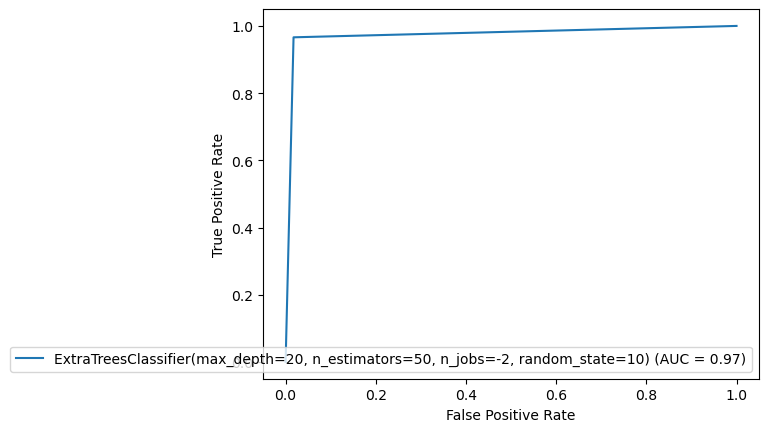

In [379]:
curve = metrics.RocCurveDisplay(fpr=fpr, tpr= tpr, roc_auc= roc_auc, estimator_name=Final_model)
curve.plot()

# Saving the best model

In [380]:
import joblib
joblib.dump(Final_model, "HR_Attrition_Prediction_Project.pkl")

['HR_Attrition_Prediction_Project.pkl']

# Loading and Prediction

In [381]:
import joblib
model= joblib.load("HR_Attrition_Prediction_Project.pkl")

In [382]:
prediction=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted value","original value"])

In [383]:
prediction

,0,1,2,3,4,5,6,7,8,9,...,685,686,687,688,689,690,691,692,693,694
Predicted value,1,0,1,0,1,1,0,1,1,1,...,1,0,1,1,1,0,0,1,1,0
original value,1,0,1,0,1,1,0,1,1,1,...,1,0,1,1,1,0,0,1,1,0
